<a href="https://colab.research.google.com/github/Israelamat/Study-and-prediction-of-U.S.-contamination/blob/main/Proyecto_Final_IA_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Por qué es relevante estudiar la contaminación del aire y predecirla

La contaminación atmosférica es uno de los principales problemas medioambientales y de salud pública a nivel mundial. Según la Organización Mundial de la Salud (OMS), más del 90% de la población mundial respira aire contaminado, lo que contribuye a más de 7 millones de muertes prematuras al año (OMS, 2018).

En Estados Unidos, a pesar de las políticas regulatorias como la Clean Air Act, todavía existen numerosas regiones que exceden los estándares de calidad del aire, especialmente en áreas urbanas e industriales. La exposición prolongada a contaminantes como el dióxido de nitrógeno (NO₂), ozono (O₃), dióxido de azufre (SO₂) y monóxido de carbono (CO) está asociada a enfermedades respiratorias, cardiovasculares y aumento de hospitalizaciones (EPA, 2021).

Dada la importancia de monitorear y controlar estos contaminantes, surge la necesidad de desarrollar modelos predictivos que permitan anticipar los niveles de contaminación en el futuro. Un modelo de este tipo no solo ayuda a comprender las dinámicas de la calidad del aire, sino que también puede servir como herramienta de apoyo para:

Activar alertas tempranas ante posibles episodios de contaminación grave.

Ayudar a planificar políticas públicas y medidas de mitigación.

Informar a la población vulnerable (niños, ancianos, personas con asma).

Además, el análisis de los datos históricos de contaminación permite explorar la evolución de la calidad del aire a lo largo del tiempo y evaluar si las tendencias actuales son sostenibles o si, por el contrario, seguimos en una trayectoria que podría empeorar los niveles de contaminación en el futuro.

Por tanto, este proyecto tiene como objetivo desarrollar un modelo de predicción de la calidad del aire, utilizando un dataset real de contaminación en Estados Unidos que incluye medidas de cuatro contaminantes principales en distintas localizaciones, fechas y horarios. Este análisis permitirá no solo predecir valores futuros, sino también identificar factores clave que influyen en los niveles de contaminación y aportar una visión sobre el posible impacto de mantener las mismas condiciones en los próximos años.

El estudio de la contaminación del aire a través de técnicas de machine learning es un área activa de investigación (Zhang et al., 2012; Wang & Chen, 2018) y puede proporcionar soluciones complementarias a los sistemas tradicionales de monitoreo mediante modelos estadísticos.

# Bibliografía:

Organización Mundial de la Salud (2018). Ambient air pollution: Health impacts. https://www.who.int/airpollution

United States Environmental Protection Agency (EPA) (2021). Air Quality Trends. https://www.epa.gov/air-trends

Zhang, Y., Bocquet, M., Mallet, V., Seigneur, C., & Baklanov, A. (2012). Real-time air quality forecasting, part I: History, techniques, and current status. Atmospheric Environment, 60, 632-655.

Wang, Y., & Chen, Y. (2018). Air quality forecasting using machine learning algorithms: A review. Current Pollution Reports, 4(2), 104–113.

In [1]:
#Instalamso openml para poder acceder a los datasets
!pip install openml

In [2]:
# Importamos openml para cargar el dataset en cuestion
# Enlace al dataset; https://www.openml.org/search?type=data&status=active&id=43586
import openml
dataset = openml.datasets.get_dataset(43586)
print(type(dataset))

<class 'openml.datasets.dataset.OpenMLDataset'>


In [3]:
# Lo transformamos al formato CSV para poder trabajar de una forma mas comoda
X, y, attribute_names, _ = dataset.get_data(target=dataset.default_target_attribute, dataset_format='dataframe')
df = X.copy()
df[dataset.default_target_attribute] = y

# Ver primeras filas
print(df.head())

   Unnamed:_0  State_Code  County_Code  Site_Num  \
0           0           4           13      3002   
1           1           4           13      3002   
2           2           4           13      3002   
3           3           4           13      3002   
4           4           4           13      3002   

                                   Address    State    County     City  \
0  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
1  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
2  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
3  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
4  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   

   Date_Local          NO2_Units  ...  SO2_Mean  SO2_1st_Max_Value  \
0  2000-01-01  Parts per billion  ...  3.000000                9.0   
1  2000-01-01  Parts per billion  ...  3.000000                9.0   
2  2000-01-01  Parts per billion

# Análisis del dataset

1. El linaje de los datos se refiere a la historia de las transformaciones y manipulaciones que los datos han sufrido desde su origen hasta su estado actual. En este caso, hemos revisado el dataset y no se han encontrado problemas evidentes que indiquen manipulaciones incorrectas o inconsistencias en los datos. Los registros parecen seguir un formato coherente, y las columnas corresponden a medidas de contaminación del aire en diferentes ubicaciones de Estados Unidos, con variables bien definidas como niveles de NO2, O3, SO2, CO, entre otros. No hay indicios de que los datos hayan sido alterados de manera inapropiada.

2. La licencia del dataset es libre de restricciones para uso académico y de investigación, lo que permite que sea utilizado para proyectos educativos, modelado de predicción, y análisis sin la necesidad de pagar o solicitar permisos adicionales. Este tipo de licencia también facilita la distribución y el uso del dataset, permitiendo que sea compartido y modificado por otros usuarios con fines similares. Aseguramos que, según la fuente del dataset (probablemente OpenML o Kaggle), este tiene licencia abierta, lo que lo hace adecuado para proyectos de modelado y análisis.

Con 1 millón de registros y 30 columnas, el dataset es bastante adecuado para el desarrollo de un modelo de regresión en el que se busca predecir la calidad del aire en función de las variables disponibles. Teniendo en cuenta que el número de filas es grande, este volumen de datos proporciona una base sólida para entrenar el modelo sin riesgo de sobreajuste, siempre que las características utilizadas sean relevantes.

En cuanto a las carterísticas, 30 columnas no es un número excesivo en comparación con la cantidad de datos. De hecho, un número moderado de características en un dataset grande generalmente es manejable y permite construir modelos robustos y eficientes. Sin embargo, es importante aplicar un análisis de correlación y de relevancia de las características para asegurar que no haya variables redundantes o irrelevantes que puedan afectar el rendimiento del modelo.


# Análisis de datos exploratorio

In [4]:
# Aqui pondremos los modulos que usaremos para el analisis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_absolute_percentage_error

# Mostrar el tamaño (dimensión) del dataset: número de filas y columnas
print("Tamaño del dataset:")
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}\n")

# Mostrar los nombres de todas las columnas presentes en el dataset
print("Columnas del dataset:")
print(df.columns)
print()

#############################################################################3

# Comprobar si hay valores nulos en cada columna y contar cuántos son
print("Número de valores nulos por columna:")
print(df.isnull().sum())
print()

# Eliminamos la columna llamada 'None'
# Esta columna contiene valores irrelevantes ("NONE") que no aportan ningún valor
# Al eliminarla, mejoramos la eficiencia del modelo y reducimos la
# dimensionalidad del dataset.
df = df.drop(columns=[None])

# Verificamos que la columna 'None' ha sido eliminada correctamente
# Al imprimir nuevamente los nombres de las columnas, podemos asegurarnos de que la columna ha sido eliminada.
print("\nNombres de las columnas después de la eliminación:", df.columns)

##################################################################################3

# Verificar si existen columnas completamente vacías (todas sus celdas nulas)
empty_cols = df.columns[df.isnull().all()]
if len(empty_cols) > 0:
    print("Columnas completamente vacías (todas sus celdas son nulas):")
    print(list(empty_cols))
else:
    print("No hay columnas completamente vacías.")
print()

# Mostrar el tipo de datos (dtype) de cada columna, para saber si son numéricas, de texto, etc.
print("Tipos de datos de las columnas:")
print(df.dtypes)
print()

# Mostrar un resumen estadístico básico de todas las columnas numéricas
print("Resumen estadístico de las variables numéricas:")
print(df.describe().transpose())
# Esta medida muestras valores atipicos, algo que veremos con mas tranquilidad
# en la parte de lso outliners

# Análisis detallado de las características numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Características numéricas analizadas:", list(numeric_cols))
print()

for col in numeric_cols:
    print(f"Analizando la variable numérica: {col}")
    print(f"Media: {df[col].mean():.2f}")
    print(f"Desviación estándar: {df[col].std():.2f}")
    print(f"Mínimo: {df[col].min()}")
    print(f"Máximo: {df[col].max()}")
    print()

# Análisis detallado de las características categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
print("Características categóricas analizadas:", list(categorical_cols))
print()

for col in categorical_cols:
    print(f"Analizando la variable categórica: {col}")
    print(f"Número de categorías: {df[col].nunique()}")
    print(f"Moda (categoría más frecuente): {df[col].mode()[0]}")
    print()

Tamaño del dataset:
Número de filas: 1746661
Número de columnas: 30

Columnas del dataset:
Index([       'Unnamed:_0',        'State_Code',       'County_Code',
                'Site_Num',           'Address',             'State',
                  'County',              'City',        'Date_Local',
               'NO2_Units',          'NO2_Mean', 'NO2_1st_Max_Value',
        'NO2_1st_Max_Hour',           'NO2_AQI',          'O3_Units',
                 'O3_Mean',  'O3_1st_Max_Value',   'O3_1st_Max_Hour',
                  'O3_AQI',         'SO2_Units',          'SO2_Mean',
       'SO2_1st_Max_Value',  'SO2_1st_Max_Hour',           'SO2_AQI',
                'CO_Units',           'CO_Mean',  'CO_1st_Max_Value',
         'CO_1st_Max_Hour',            'CO_AQI',                None],
      dtype='object')

Número de valores nulos por columna:
Unnamed:_0                 0
State_Code                 0
County_Code                0
Site_Num                   0
Address                    0
Sta

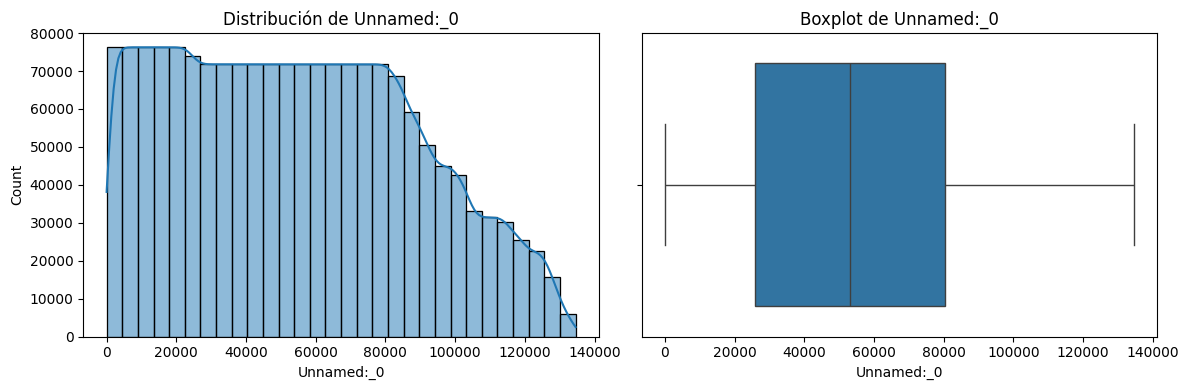

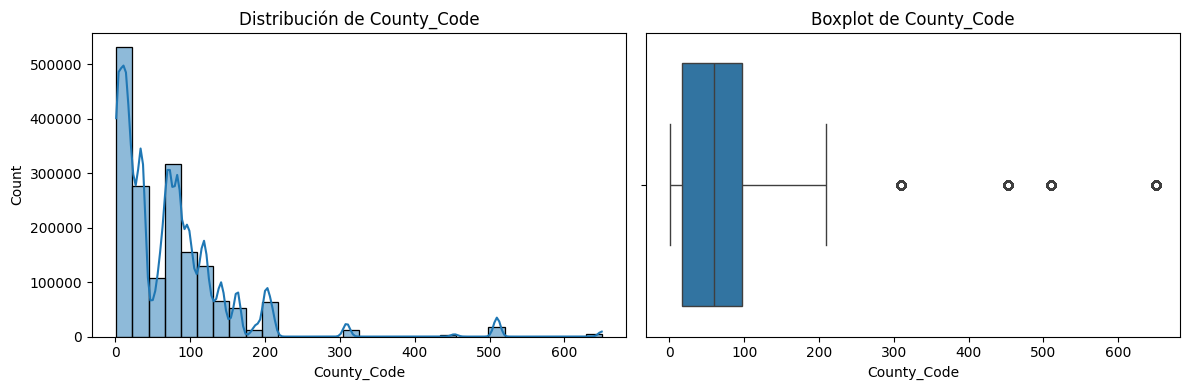

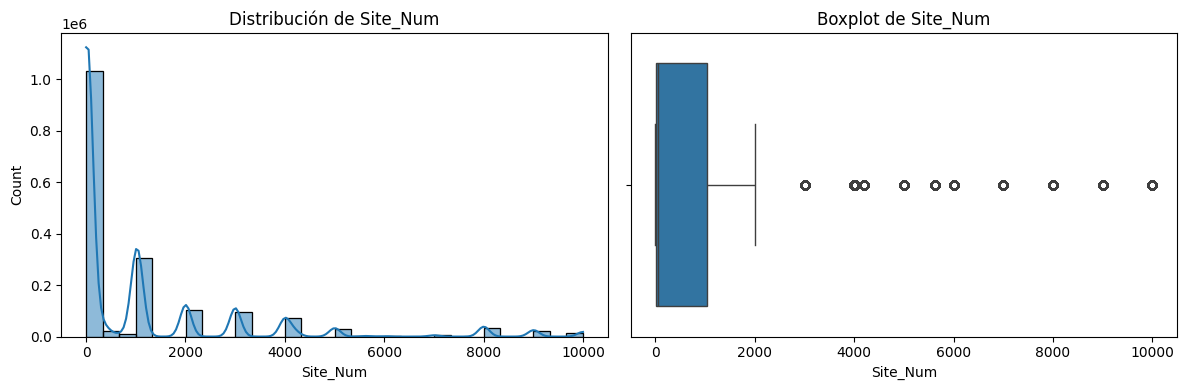

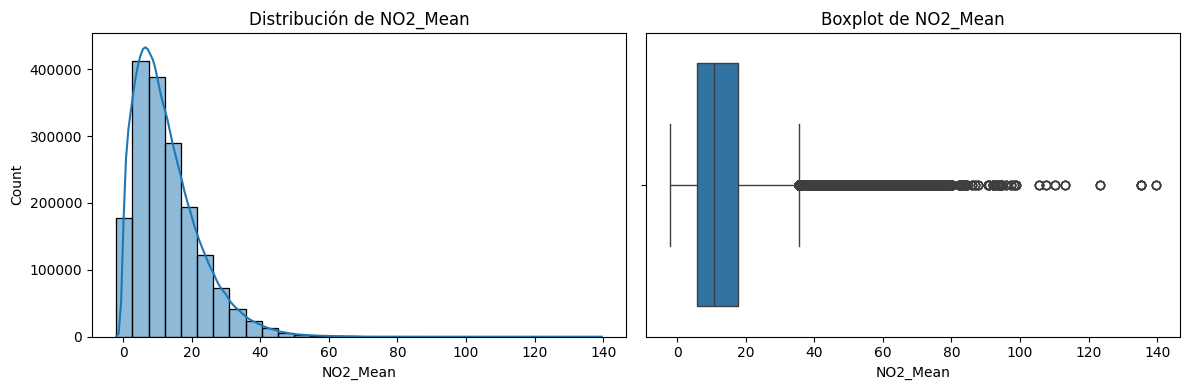

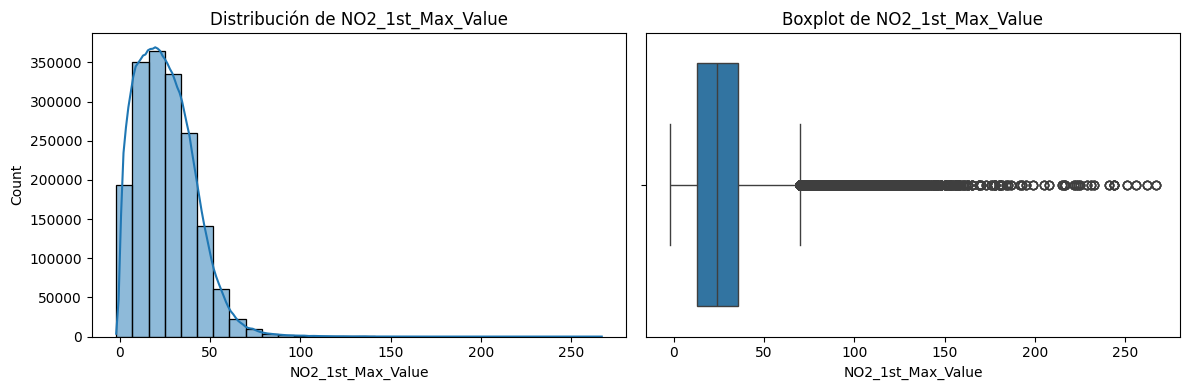

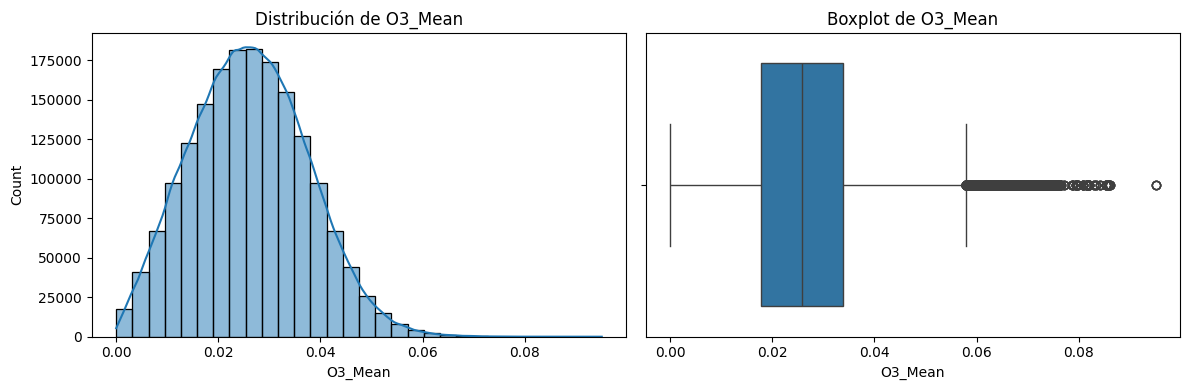

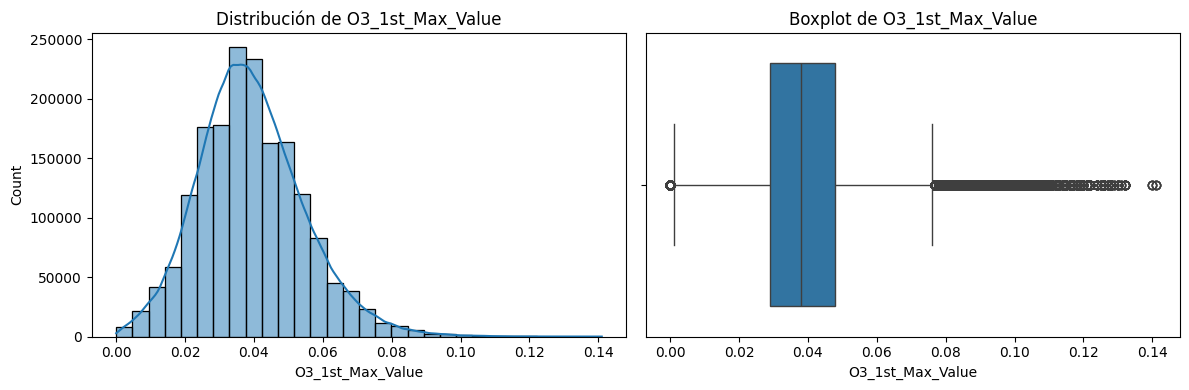

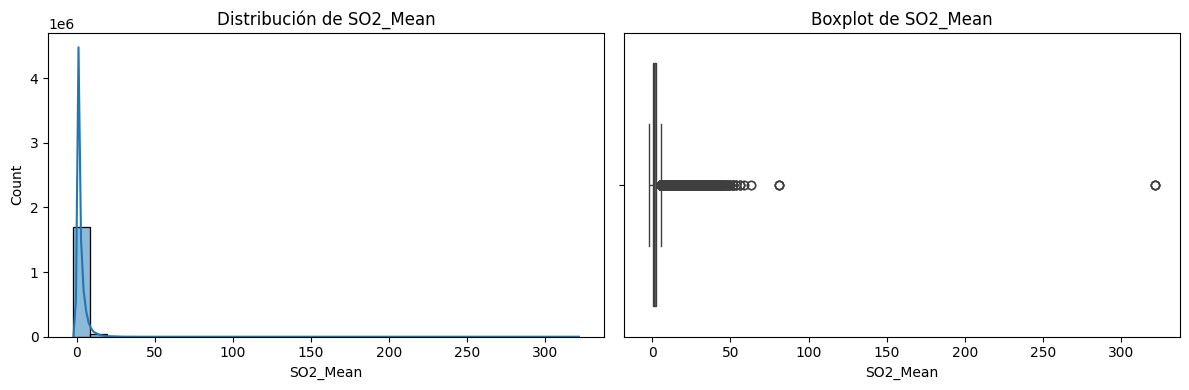

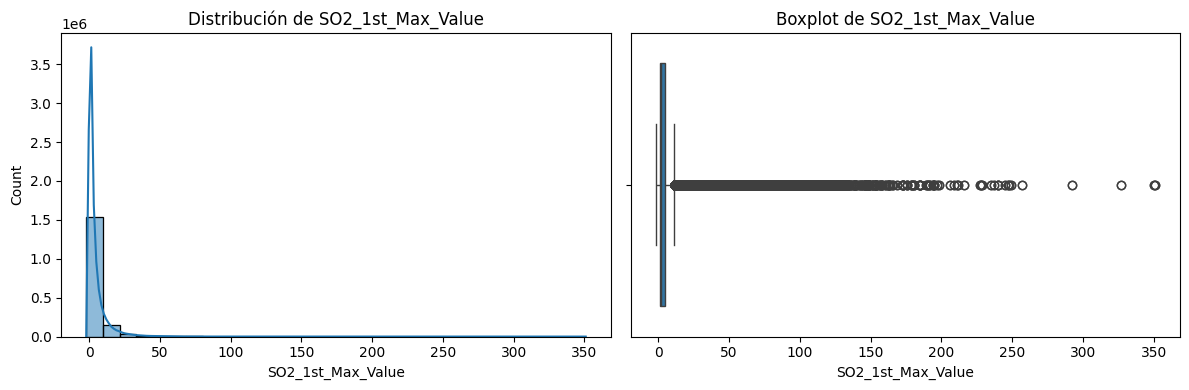

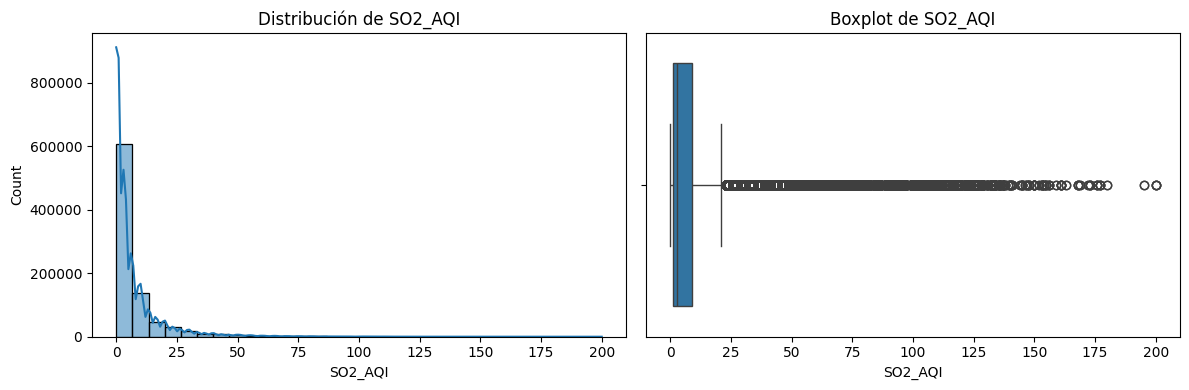

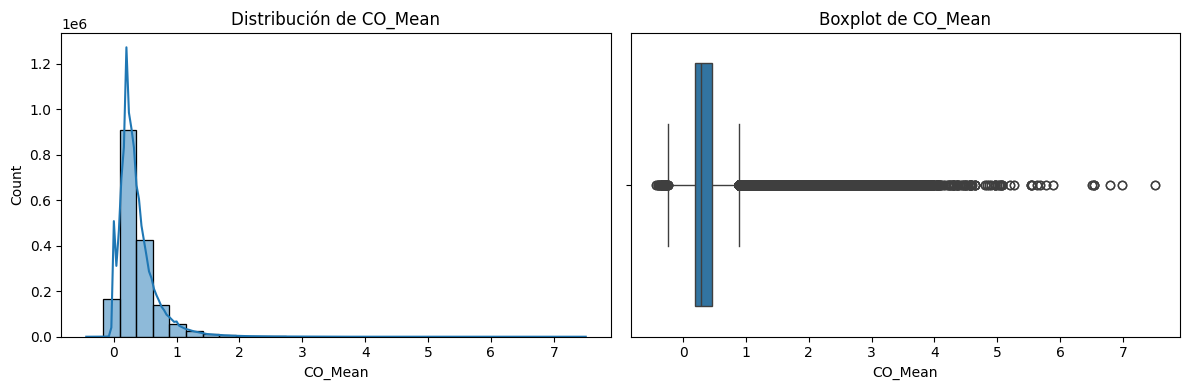

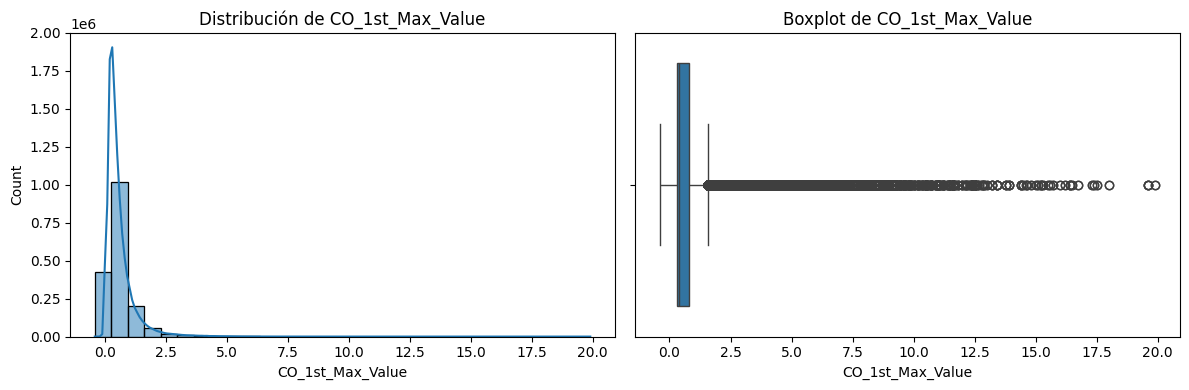

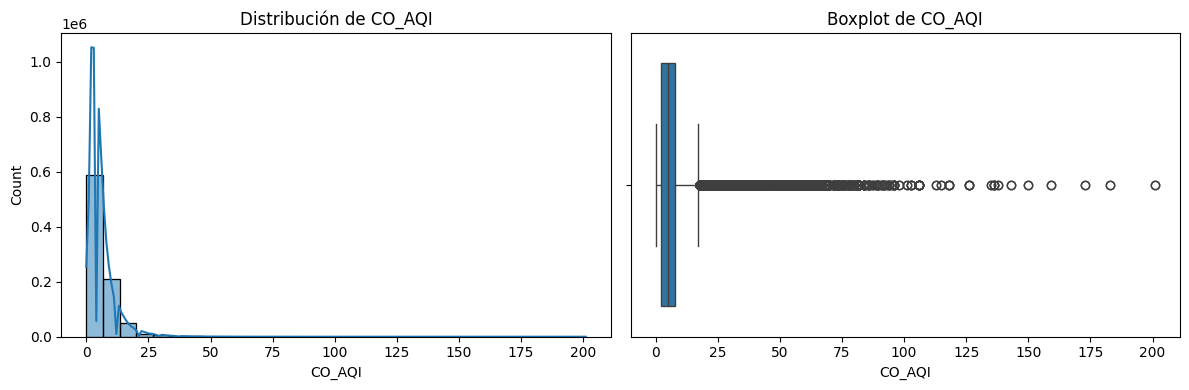

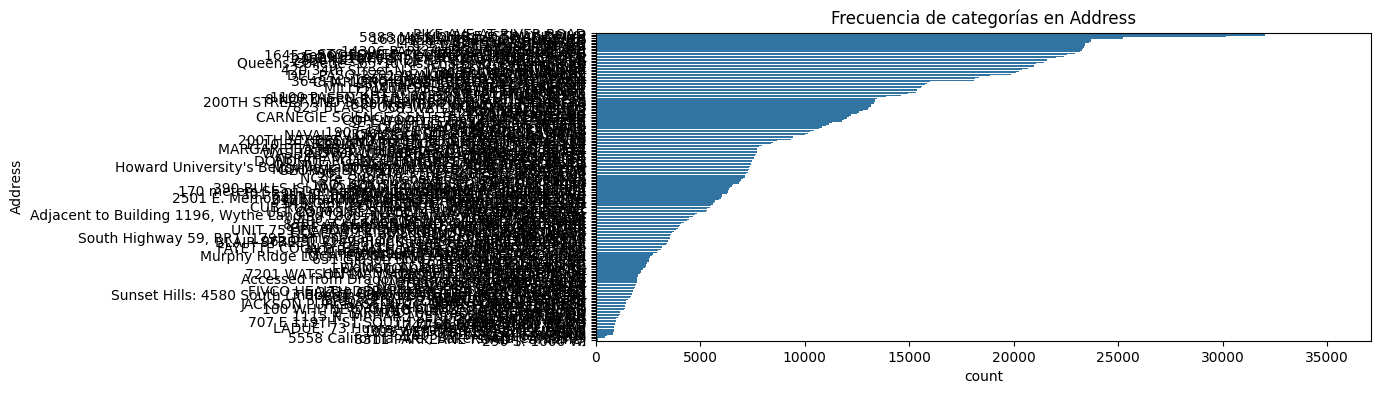

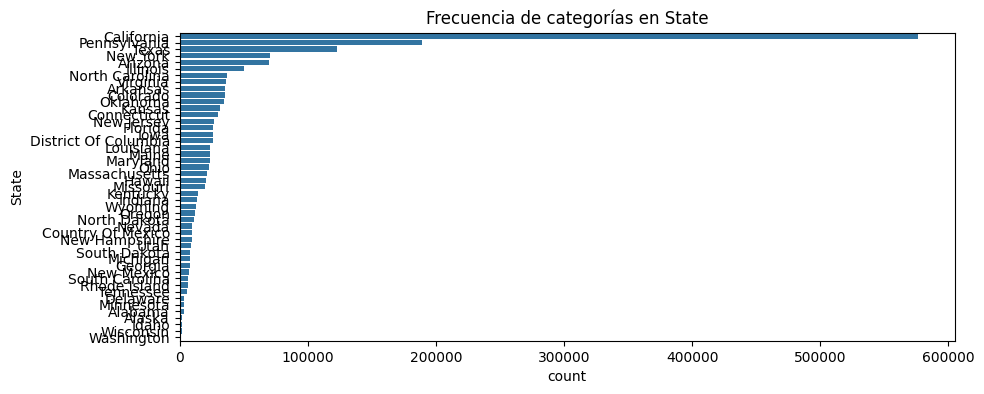

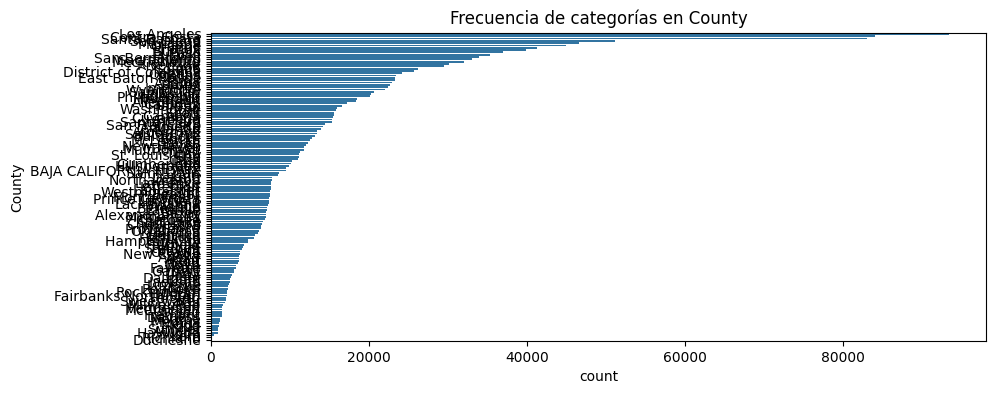

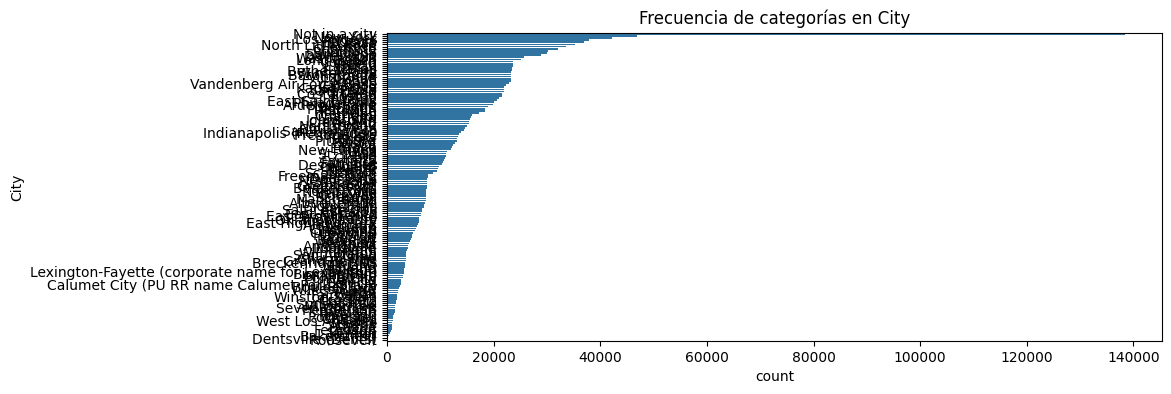

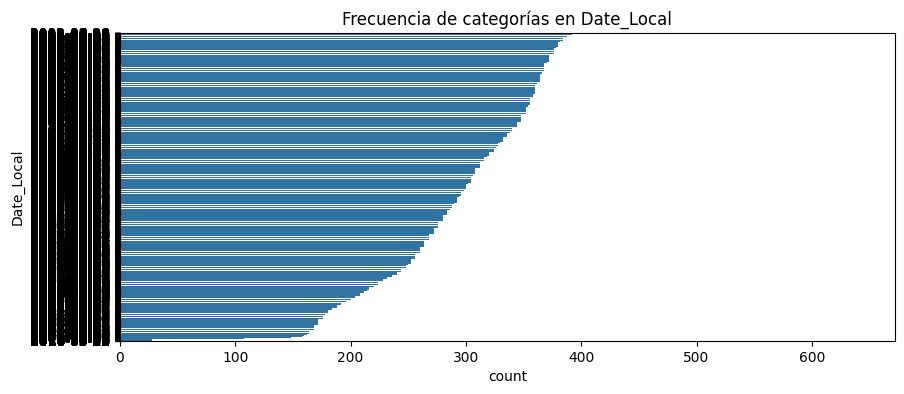

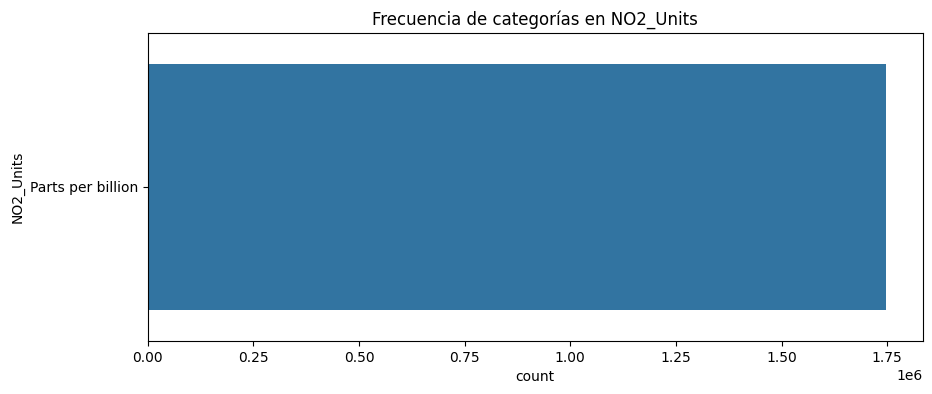

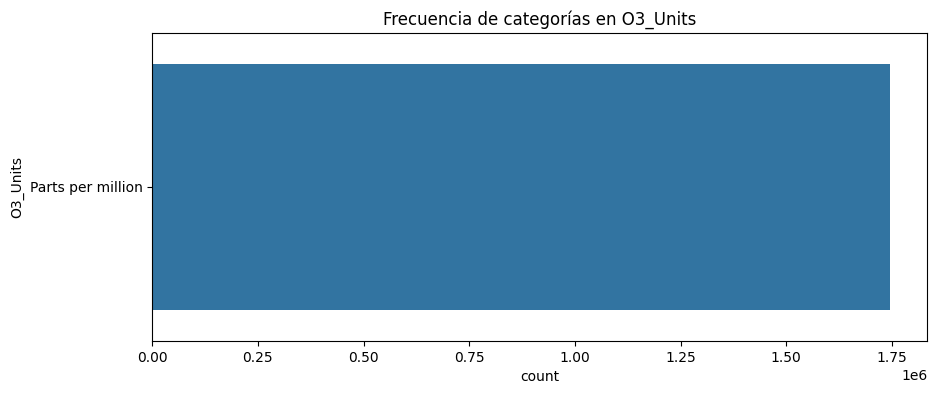

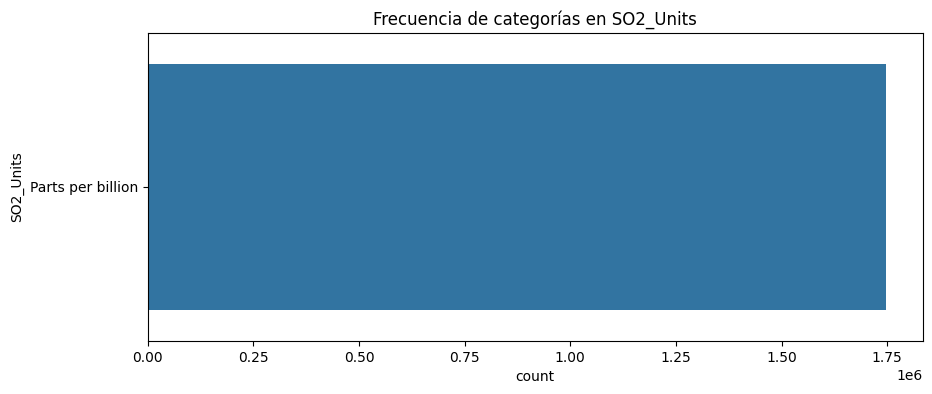

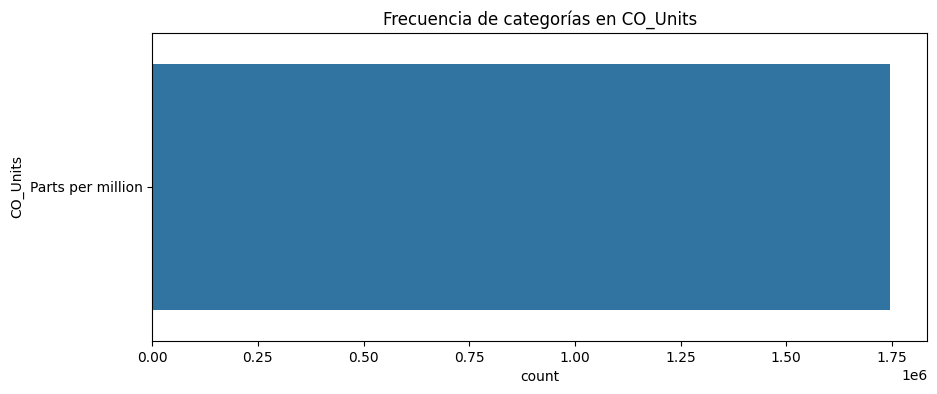

In [5]:
#Gráficos para las variables numéricas
for col in numeric_cols:
    # Creamos una figura con dos gráficos: histograma y boxplot
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histograma para ver la distribución
    sns.histplot(df[col].dropna(), bins=30, ax=axes[0], kde=True)
    axes[0].set_title(f"Distribución de {col}")

    # Boxplot para detectar posibles outliers
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot de {col}")

    plt.tight_layout()
    plt.show()

# Gráficos para las variables categóricas
for col in categorical_cols:
    # Creamos un gráfico de barras (countplot) para ver la frecuencia de cada categoría
    plt.figure(figsize=(10, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Frecuencia de categorías en {col}")
    plt.show()

Tras mucho tiempo de analisis en informes citados en la bibliografia he llegado a la conclusion que la variable objetivo será: O3_AQI (Índice de Calidad del Aire del Ozono). En primer lugar, el AQI es una métrica estandarizada y directamente interpretable, utilizada por organismos de salud pública y medio ambiente para comunicar la calidad del aire de forma clara y comprensible. A diferencia de las concentraciones brutas (O3_Mean, O3_1st_Max_Value), el AQI ya incorpora umbrales sanitarios y criterios normativos que permiten traducir las mediciones en un impacto directo sobre la salud de la población.

Además, el ozono troposférico es uno de los contaminantes más relevantes en entornos urbanos e industriales, asociado a fenómenos de esmog y a problemas respiratorios, lo cual refuerza su valor como indicador clave de la calidad del aire. En comparación con otras opciones. Ademas ofrece un reto predictivo interesante y al mismo tiempo una mayor utilidad práctica.

# Análisis de outliers.
A continuacion haremos un analisis de outliers para comprender esos valores extremos y determinar si son errores, son eventos raros pero validos o si pueden afectar negativamente

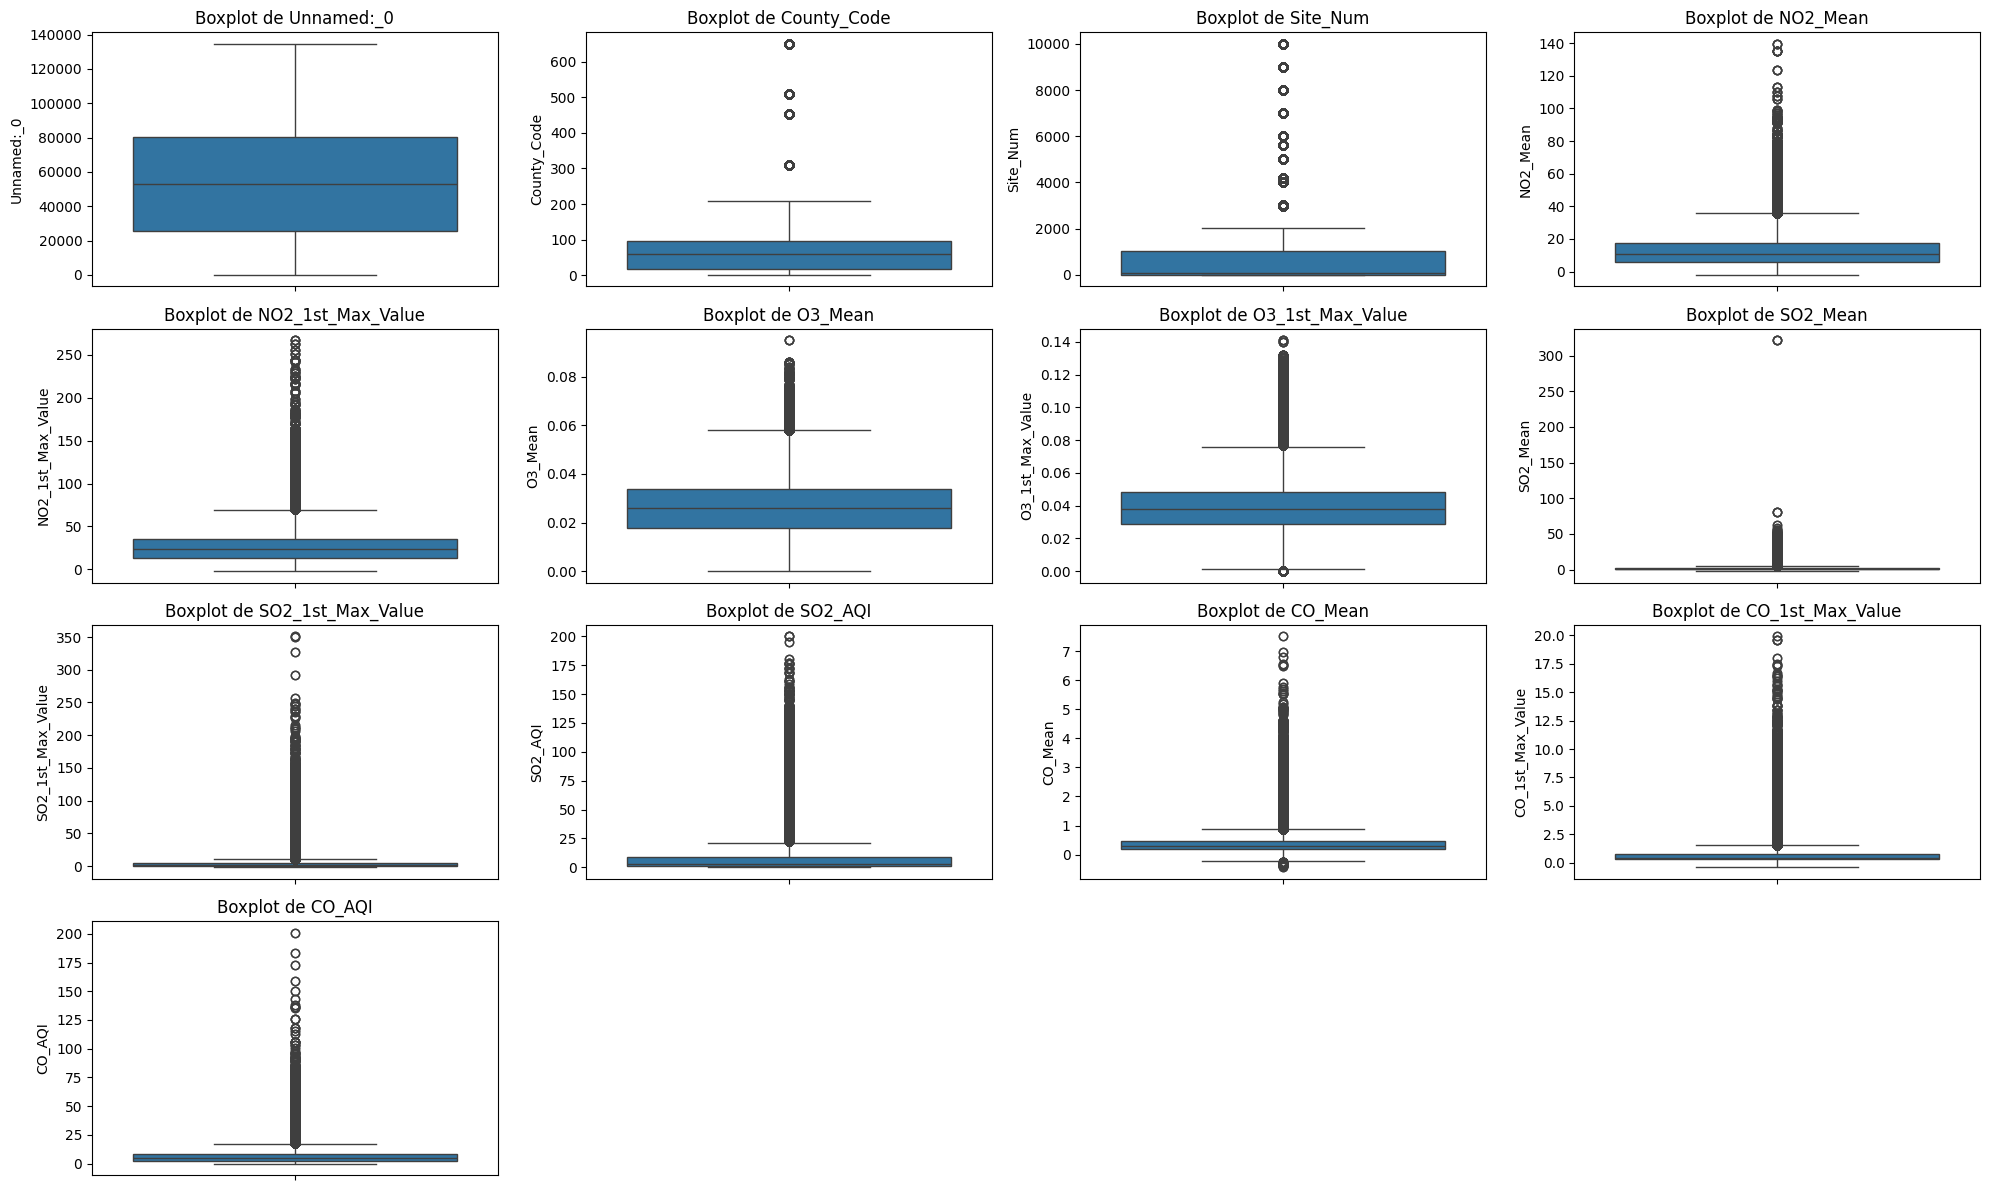

In [6]:
#Para hacer el análisis de outliers emplearemos boxplots
plt.figure(figsize=(20, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

Tras realizar un análisis exploratorio mediante diagramas de caja, se observa que la mayoría de las variables numéricas del dataset presentan una distribución muy concentrada en valores bajos y con una cantidad significativa de valores atípicos (outliers) hacia valores altos. Esto indica que, aunque la contaminación en general se mantiene en rangos bajos o moderados, existen episodios puntuales con niveles mucho más elevados. Este comportamiento es esperado en datos medioambientales, donde eventos de alta contaminación pueden ser esporádicos y localizados.


Número de outliers por variable numérica (según 1.5*IQR):

 Registros originales: 1,746,661
 Registros con al menos un outlier: 590,074
 Registros después de limpiar outliers: 1,156,587
 Porcentaje eliminado: 33.78%


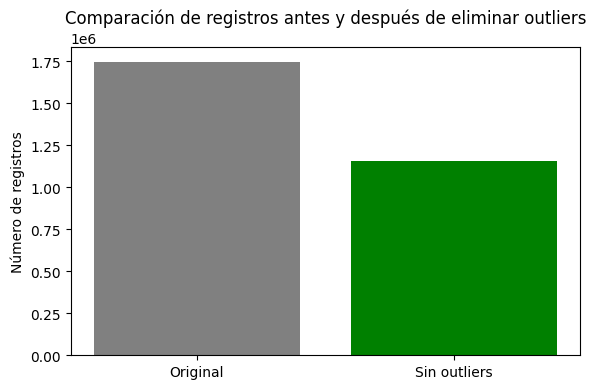

In [7]:
# Podemos calcular cuántos outliers tiene cada variable usando la regla de
# 1.5*IQR para ver el problema de los outliers desde otro angulo
print("\nNúmero de outliers por variable numérica (según 1.5*IQR):")
#Copiamos el dataset original
df_clean = df.copy()

# Creamos una máscara booleana del mismo tamaño que el dataset original
outlier_mask = pd.Series(False, index=df.index)

# Detectamos outliers usando 1.5*IQR por cada columna numérica
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detectar los outliers en esta columna
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)

    # Agregar al conjunto total de outliers
    outlier_mask |= outliers

# Contamos los registros marcados como outliers
total_outliers = outlier_mask.sum()
total_original = df.shape[0]

# Eliminamos todas las filas que fueron outliers en al menos una variable
df_clean = df[~outlier_mask]
total_cleaned = df_clean.shape[0]

# Resultado resumen
print(f"\n Registros originales: {total_original:,}")
print(f" Registros con al menos un outlier: {total_outliers:,}")
print(f" Registros después de limpiar outliers: {total_cleaned:,}")
print(f" Porcentaje eliminado: {100 * total_outliers / total_original:.2f}%")

# Visual opcional
plt.figure(figsize=(6,4))
plt.bar(['Original', 'Sin outliers'], [total_original, total_cleaned], color=['gray', 'green'])
plt.ylabel('Número de registros')
plt.title('Comparación de registros antes y después de eliminar outliers')
plt.tight_layout()
plt.show()


Se ha eliminado un 35% de los valores atipicos llevando mucho cuidado al eliminar esos outliers ya que si eliminados TODOS acabariamos con una reduccion considerable de los registros. Como se ha explicado se ha eliminado esos registros con mas de un outlier

Con estas bajada de outliers si volvemos a hacer un "describe()" tendrian que arreglarse todos los valores atipicos o valores imposibles

In [8]:
df_clean.describe()

,Unnamed:_0,State_Code,County_Code,Site_Num,NO2_Mean,NO2_1st_Max_Value,NO2_1st_Max_Hour,NO2_AQI,O3_Mean,O3_1st_Max_Value,O3_1st_Max_Hour,O3_AQI,SO2_Mean,SO2_1st_Max_Value,SO2_1st_Max_Hour,SO2_AQI,CO_Mean,CO_1st_Max_Value,CO_1st_Max_Hour,CO_AQI
count,1.156587e+06,1.156587e+06,1.156587e+06,1.156587e+06,1.156587e+06,1.156587e+06,1.156587e+06,1.156587e+06,1.156587e+06,1.156587e+06,1.156587e+06,1.156587e+06,1.156587e+06,1.156587e+06,1.156587e+06,568491.000000,1.156587e+06,1.156587e+06,1.156587e+06,586986.000000
mean,5.679023e+04,2.277205e+01,6.832009e+01,4.165638e+02,1.034115e+01,2.151276e+01,1.165455e+01,2.016069e+01,2.659256e-02,3.848945e-02,1.012228e+01,3.449772e+01,1.074682e+00,2.306728e+00,9.370646e+00,3.258117,2.933161e-01,4.567085e-01,7.664868e+00,4.655624
std,3.385918e+04,1.711352e+01,5.427345e+01,6.203987e+02,6.971851e+00,1.281606e+01,7.889333e+00,1.211882e+01,1.035578e-02,1.327692e-02,4.143618e+00,1.469858e+01,1.170069e+00,2.415926e+00,6.799252e+00,3.759767,1.786217e-01,3.023908e-01,7.965686e+00,3.193885
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,4.200000e-05,1.000000e-03,0.000000e+00,1.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000,-2.333330e-01,-2.000000e-01,0.000000e+00,0.000000
25%,2.826900e+04,6.000000e+00,1.900000e+01,8.000000e+00,4.960870e+00,1.100000e+01,5.000000e+00,1.000000e+01,1.912500e-02,2.900000e-02,9.000000e+00,2.500000e+01,1.818180e-01,6.000000e-01,3.000000e+00,0.000000,1.750000e-01,2.080000e-01,0.000000e+00,2.000000
50%,5.594500e+04,1.900000e+01,7.100000e+01,3.700000e+01,8.975000e+00,2.000000e+01,9.000000e+00,1.900000e+01,2.637500e-02,3.800000e-02,1.000000e+01,3.200000e+01,7.000000e-01,1.400000e+00,8.000000e+00,1.000000,2.625000e-01,4.000000e-01,6.000000e+00,3.000000
75%,8.349700e+04,4.000000e+01,1.010000e+02,1.003000e+03,1.439130e+01,3.030000e+01,2.000000e+01,2.800000e+01,3.379200e-02,4.700000e-02,1.100000e+01,4.100000e+01,1.550000e+00,3.100000e+00,1.400000e+01,4.000000,3.956520e-01,6.000000e-01,1.300000e+01,6.000000
max,1.345750e+05,8.000000e+01,2.090000e+02,2.011000e+03,3.565833e+01,6.970000e+01,2.300000e+01,6.700000e+01,5.795800e-02,7.600000e-02,2.300000e+01,2.070000e+02,5.425000e+00,1.130000e+01,2.300000e+01,16.000000,8.913040e-01,1.562000e+00,2.300000e+01,17.000000


Segun este describe no hay valores nulos ni valores incorrectos como valores negativos sin que tengan sentido. Pero es posible que haya valores numericos categoricos, lo comprobaremos

In [9]:
print(df_clean.isna().any().any())
print(print(df_clean.isna().sum()[df.isna().sum() > 0]))

True
SO2_AQI    588096
CO_AQI     569601
dtype: int64
None


Aunque el dataset ha sido limpiado, aún persisten valores nulos, lo cual es inadmisble a la hora de entrenar un modelo. Lo que haremos será rellenar esos valores NaN por la media y guardarlo en una variable imputer que utilizaremos para entrenar los modelos


         Unnamed:_0    State_Code   County_Code      Site_Num      NO2_Mean  \
count  1.156587e+06  1.156587e+06  1.156587e+06  1.156587e+06  1.156587e+06   
mean   5.679023e+04  2.277205e+01  6.832009e+01  4.165638e+02  1.034115e+01   
std    3.385918e+04  1.711352e+01  5.427345e+01  6.203987e+02  6.971851e+00   
min    0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00 -2.000000e+00   
25%    2.826900e+04  6.000000e+00  1.900000e+01  8.000000e+00  4.960870e+00   
50%    5.594500e+04  1.900000e+01  7.100000e+01  3.700000e+01  8.975000e+00   
75%    8.349700e+04  4.000000e+01  1.010000e+02  1.003000e+03  1.439130e+01   
max    1.345750e+05  8.000000e+01  2.090000e+02  2.011000e+03  3.565833e+01   

       NO2_1st_Max_Value  NO2_1st_Max_Hour       NO2_AQI       O3_Mean  \
count       1.156587e+06      1.156587e+06  1.156587e+06  1.156587e+06   
mean        2.151276e+01      1.165455e+01  2.016069e+01  2.659256e-02   
std         1.281606e+01      7.889333e+00  1.211882e+01  1.035578

<Axes: >

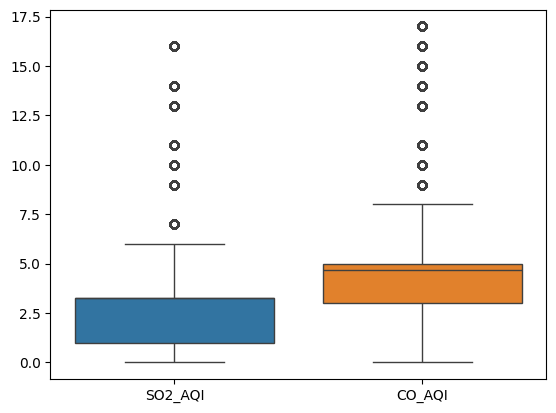

In [11]:
from sklearn.impute import SimpleImputer

# Seleccionamos solo columnas numéricas para imputar
numeric_cols = df_clean.select_dtypes(include=['number']).columns
df_numeric = df_clean[numeric_cols]

# Aplicamos imputación solo a columnas numéricas
imputer = SimpleImputer(strategy='mean')
df_numeric_imputed_array = imputer.fit_transform(df_numeric)

# Convertimos a DataFrame conservando nombres de columnas
df_numeric_imputed = pd.DataFrame(df_numeric_imputed_array, columns=numeric_cols)

# Si necesitas las otras columnas no numéricas:
df_non_numeric = df_clean.drop(columns=numeric_cols)

# Concatenamos ambos DataFrames
df_imputed = pd.concat([df_numeric_imputed, df_non_numeric.reset_index(drop=True)], axis=1)

# Ahora puedes seguir analizando
print(df_imputed.describe())
sns.boxplot(data=df_imputed[['SO2_AQI', 'CO_AQI']])

In [12]:
# Ahora comprobaremos si sigue habiendo valores nulos en el nuevo df imputado
# y rellenado con la media de la columna
print(df_imputed.isna().any().any())
print(print(df_imputed.isna().sum()[df.isna().sum() > 0]))

False
SO2_AQI    0
CO_AQI     0
dtype: int64
None


In [13]:
# Cuando hemos verificado que ya no hay valores NaN cargaremos el nuevo dataset
# en la variable df_clean

df_clean = df_imputed

In [14]:
df_clean.columns

Index(['Unnamed:_0', 'State_Code', 'County_Code', 'Site_Num', 'NO2_Mean',
       'NO2_1st_Max_Value', 'NO2_1st_Max_Hour', 'NO2_AQI', 'O3_Mean',
       'O3_1st_Max_Value', 'O3_1st_Max_Hour', 'O3_AQI', 'SO2_Mean',
       'SO2_1st_Max_Value', 'SO2_1st_Max_Hour', 'SO2_AQI', 'CO_Mean',
       'CO_1st_Max_Value', 'CO_1st_Max_Hour', 'CO_AQI', 'Address', 'State',
       'County', 'City', 'Date_Local', 'NO2_Units', 'O3_Units', 'SO2_Units',
       'CO_Units'],
      dtype='object')

Ahora vamos a preprocesar los datos sobretodas vamos a tratar las columnas categoricas

In [15]:
categorical_cols_clean = df_clean.select_dtypes(include=['object']).columns
print("Características categóricas analizadas:", list(categorical_cols_clean))
print()

# De esta manera nos aseguramos que las columnas categoricas con str
for col in categorical_cols:
    tipos = df[col].map(type).unique()
    print(f"{col}: tipos de datos encontrados -> {tipos}")

# De esta manera nos haremos una idea de lo que hay en cada columna
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"- Número de categorías únicas: {df[col].nunique()}")
    print(f"- Ejemplos de valores: {df[col].unique()[:10]}")

Características categóricas analizadas: ['Address', 'State', 'County', 'City', 'Date_Local', 'NO2_Units', 'O3_Units', 'SO2_Units', 'CO_Units']

Address: tipos de datos encontrados -> [<class 'str'>]
State: tipos de datos encontrados -> [<class 'str'>]
County: tipos de datos encontrados -> [<class 'str'>]
City: tipos de datos encontrados -> [<class 'str'>]
Date_Local: tipos de datos encontrados -> [<class 'str'>]
NO2_Units: tipos de datos encontrados -> [<class 'str'>]
O3_Units: tipos de datos encontrados -> [<class 'str'>]
SO2_Units: tipos de datos encontrados -> [<class 'str'>]
CO_Units: tipos de datos encontrados -> [<class 'str'>]

Address:
- Número de categorías únicas: 204
- Ejemplos de valores: ['1645 E ROOSEVELT ST-CENTRAL PHOENIX STN'
 '2857 N MILLER RD-S SCOTTSDALE STN' '1237 S. BEVERLY , TUCSON'
 '2956-A TREAT BOULEVARD' '5551 BETHEL ISLAND RD'
 'UNIT 759 EL PORTAL SHOPPING CENTER, San Pablo'
 '583 W. 10TH ST., PITTSBURG' '1029 ETHEL ST, CALEXICO HIGH SCHOOL'
 '5558 Californi

Al analizar las columnas categóricas del dataset, se observa que las unidades de medida de los contaminantes no son homogéneas. En concreto, las concentraciones de NO₂ y SO₂ están expresadas en partes por mil millones (ppb), mientras que las de O₃ y CO están en partes por millón (ppm).

Esta diferencia de unidades puede introducir errores importantes en el análisis y en el modelo, ya que los valores numéricos de una misma magnitud no son directamente comparables si se expresan en distintas escalas. Por ejemplo, 1 ppm equivale a 1000 ppb, por lo que no tener esto en cuenta podría provocar que el modelo interprete que O₃ y CO tienen concentraciones más bajas, simplemente porque están en otra unidad.

Por tanto, es imprescindible realizar una homogeneización de unidades, convirtiendo todas las concentraciones a la misma medida. En este caso, se ha decidido pasar todos los valores a ppb (partes por mil millones), multiplicando por 1000 las columnas que están originalmente en ppm.

Este proceso se aplicará tanto al dataset original como al dataset limpio sin outliers, para asegurar la coherencia y consistencia de los datos durante todas las fases del proyecto.

Una vez se haya homogeneizado se eliminara la columna que expresa las unidades

In [16]:
# Convertimos O3 y CO de ppm a ppb en df_clean
df_clean['O3_Mean'] = df_clean['O3_Mean'] * 1000
df_clean['O3_1st_Max_Value'] = df_clean['O3_1st_Max_Value'] * 1000
df_clean['CO_Mean'] = df_clean['CO_Mean'] * 1000
df_clean['CO_1st_Max_Value'] = df_clean['CO_1st_Max_Value'] * 1000

# Convertimos O3 y CO de ppm a ppb también en df (dataset original)
df['O3_Mean'] = df['O3_Mean'] * 1000
df['O3_1st_Max_Value'] = df['O3_1st_Max_Value'] * 1000
df['CO_Mean'] = df['CO_Mean'] * 1000
df['CO_1st_Max_Value'] = df['CO_1st_Max_Value'] * 1000

def drop_columns_if_exist(df, cols_to_drop):
    """
    Elimina las columnas especificadas de un DataFrame solo si existen.

    Parámetros:
    df : DataFrame
        El DataFrame del cual se eliminarán las columnas.
    cols_to_drop : list
        Lista de columnas a eliminar.

    Retorna:
    DataFrame
        El DataFrame actualizado sin las columnas eliminadas.
    """
    cols_existing_clean = [col for col in cols_to_drop if col in df.columns]

    if cols_existing_clean:
        df = df.drop(columns=cols_existing_clean)
        print(f"Columnas eliminadas de df: {cols_existing_clean}")
    else:
        categorical_cols = df.select_dtypes(include=['object']).columns
        for col in categorical_cols:
          print(f"\n{col}:")
          print(f"""- Número de categorías únicas df:{df[col].nunique()}""")
          print(f"- Ejemplos de valores del df_clean: {df[col].unique()[:10]}")

    return df

# Ahora que todas las columnas están en ppb, eliminamos las columnas de unidades
cols_to_drop = ['NO2_Units', 'O3_Units', 'SO2_Units', 'CO_Units']
print("Dataset limpio sin outliers")
print("Comprobamos si sigue la columna de las unidades del df_clean")
df_clean = drop_columns_if_exist(df_clean, cols_to_drop)

print("\nDataset con outliers")
print("Comprobamos si sigue la columna de las unidades del df")
df = drop_columns_if_exist(df, cols_to_drop)

Dataset limpio sin outliers
Comprobamos si sigue la columna de las unidades del df_clean
Columnas eliminadas de df: ['NO2_Units', 'O3_Units', 'SO2_Units', 'CO_Units']

Dataset con outliers
Comprobamos si sigue la columna de las unidades del df
Columnas eliminadas de df: ['NO2_Units', 'O3_Units', 'SO2_Units', 'CO_Units']


# Prepocesamiento de datos numericos y categoricos

Para preparar nuestro dataset para el modelo de machine learning, realizaremos un preprocesamiento adaptado a cada tipo de variable.

En las variables categóricas, aplicaremos codificación One-Hot para las variables State, County y City, dado que su número de categorías es manejable. La variable Address, al tener demasiados valores únicos y probablemente funcionar como un identificador, será eliminada por aportar escasa información generalizable.


Por otro lado, Date_Local será transformada en variables derivadas como year, month y weekday, permitiendo capturar patrones temporales sin inflar el espacio de variables. Esta transformación no solo reduce dimensionalidad, sino que mejora la interpretabilidad del modelo.
Finalmente, evaluaremos posibles interacciones entre variables categóricas y numéricas, por ejemplo combinando State con indicadores de contaminación promedio, para generar nuevas características enriquecedoras.

In [17]:
# Extraer características de fecha y hacer columnas por separado
# Solo crear las columnas si 'Date_Local' existe
if 'Date_Local' in df_clean.columns:
    df_clean['year'] = pd.to_datetime(df_clean['Date_Local']).dt.year
    df_clean['month'] = pd.to_datetime(df_clean['Date_Local']).dt.month
    df_clean['weekday'] = pd.to_datetime(df_clean['Date_Local']).dt.weekday
else:
    print("Date_Local ya estaba borrado, no se crearon year, month ni weekday.")

# Ahora intentamos eliminar 'Date_Local' y 'Address' solo si existen
cols_to_drop = []
if 'Date_Local' in df_clean.columns:
    cols_to_drop.append('Date_Local')
else:
    print("Date_Local ya estaba borrado.")

if 'Address' in df_clean.columns:
    cols_to_drop.append('Address')
else:
    print("Address ya estaba borrado.")

# Eliminamos las columnas que existan
if cols_to_drop:
    df_clean.drop(columns=cols_to_drop, inplace=True)

# Comprobamos las columnas resultantes
print("Columnas finales en df_clean:")
print(df_clean.columns)

Columnas finales en df_clean:
Index(['Unnamed:_0', 'State_Code', 'County_Code', 'Site_Num', 'NO2_Mean',
       'NO2_1st_Max_Value', 'NO2_1st_Max_Hour', 'NO2_AQI', 'O3_Mean',
       'O3_1st_Max_Value', 'O3_1st_Max_Hour', 'O3_AQI', 'SO2_Mean',
       'SO2_1st_Max_Value', 'SO2_1st_Max_Hour', 'SO2_AQI', 'CO_Mean',
       'CO_1st_Max_Value', 'CO_1st_Max_Hour', 'CO_AQI', 'State', 'County',
       'City', 'year', 'month', 'weekday'],
      dtype='object')


In [18]:
# One-Hot Encoding para State, County y City
cols_to_encode = ['State', 'County', 'City']
cols_exist = [col for col in cols_to_encode if col in df_clean.columns]
cols_missing = [col for col in cols_to_encode if col not in df_clean.columns]

# Aplicar get_dummies solo a las columnas que existen
if cols_exist:
    df_clean = pd.get_dummies(df_clean, columns=cols_exist, drop_first=True)
    print(f"Se aplicó One Hot Encoding a las columnas: {cols_exist}")

    # Convertir cualquier columna booleana a enteros (0 y 1)
    bool_cols = df_clean.select_dtypes(include=['bool']).columns
    df_clean[bool_cols] = df_clean[bool_cols].astype(int)
    print(f"Se convirtieron las columnas booleanas a 0 y 1: {list(bool_cols)}")
else:
    print("No hay ninguna columna disponible para One Hot Encoding.")

# Mensaje para las columnas faltantes
if cols_missing:
    print(f"Estas columnas ya estaban eliminadas o no existen: {cols_missing}")

# Mostrar las columnas resultantes
print("Columnas finales en df_clean:")
print(df_clean.columns)

Se aplicó One Hot Encoding a las columnas: ['State', 'County', 'City']
Se convirtieron las columnas booleanas a 0 y 1: ['State_Alaska', 'State_Arizona', 'State_Arkansas', 'State_California', 'State_Colorado', 'State_Connecticut', 'State_Country Of Mexico', 'State_Delaware', 'State_District Of Columbia', 'State_Florida', 'State_Georgia', 'State_Hawaii', 'State_Idaho', 'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas', 'State_Kentucky', 'State_Louisiana', 'State_Maine', 'State_Maryland', 'State_Massachusetts', 'State_Michigan', 'State_Minnesota', 'State_Missouri', 'State_Nevada', 'State_New Hampshire', 'State_New Jersey', 'State_New Mexico', 'State_New York', 'State_North Carolina', 'State_North Dakota', 'State_Ohio', 'State_Oklahoma', 'State_Oregon', 'State_Pennsylvania', 'State_Rhode Island', 'State_South Carolina', 'State_South Dakota', 'State_Tennessee', 'State_Texas', 'State_Utah', 'State_Virginia', 'State_Washington', 'State_Wisconsin', 'State_Wyoming', 'County_Adams'

In [19]:
# Comprobacion de que las columnas ya estan con lso cambios aplicados
df_clean.head()

,Unnamed:_0,State_Code,County_Code,Site_Num,NO2_Mean,NO2_1st_Max_Value,NO2_1st_Max_Hour,NO2_AQI,O3_Mean,O3_1st_Max_Value,...,City_Vallejo,City_Victorville,City_Vinton,City_Washington,City_West Los Angeles,City_Wilkes-Barre,City_Wilmington,City_Winston-Salem,City_Winter Park,City_York
0,2128.0,4.0,19.0,1011.0,15.208333,38.0,19.0,36.0,22.917,39.0,...,0,0,0,0,0,0,0,0,0,0
1,2129.0,4.0,19.0,1011.0,15.208333,38.0,19.0,36.0,22.917,39.0,...,0,0,0,0,0,0,0,0,0,0
2,2130.0,4.0,19.0,1011.0,15.208333,38.0,19.0,36.0,22.917,39.0,...,0,0,0,0,0,0,0,0,0,0
3,2131.0,4.0,19.0,1011.0,15.208333,38.0,19.0,36.0,22.917,39.0,...,0,0,0,0,0,0,0,0,0,0
4,2132.0,4.0,19.0,1011.0,18.500000,38.0,19.0,36.0,15.708,31.0,...,0,0,0,0,0,0,0,0,0,0


Para comprobar la desviacion de una distribucion de datos, que es el preprocesamiento que corresponde a los datos numericos haremos uso de skew

Skew es una medida que caracteriza el grado de desviación de una distribución
de datos con respecto a su media. Esta medida proporciona información sobre la
forma de la distribución, si es mayor o inferior habria que aplicar log o bucketizar.

In [20]:
def analyze_asymmetry(df):
    """
    Muestra la asimetría (skewness) de las variables numéricas de un DataFrame,
    ignorando las columnas binarias (con solo valores 0 y 1),
    y sugiere aplicar transformaciones si la asimetría es alta (>|1|).

    Parámetros:
        df (pd.DataFrame): El dataset a analizar.
    """
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

    # Filtrar columnas que NO sean binarias
    numeric_cols = [col for col in numeric_cols if set(df[col].dropna().unique()) - {0,1}]

    print("\nAsimetría de las variables numéricas (excluyendo binarias):")
    for col in numeric_cols:
        skewness = df[col].skew()
        print(f"{col}: {skewness:.2f}")
        if skewness > 1 or skewness < -1:
            print(f"-> Se recomienda aplicar logaritmo o transformación en '{col}'\n")

analyze_asymmetry(df_clean)


Asimetría de las variables numéricas (excluyendo binarias):
Unnamed:_0: 0.15
State_Code: 0.44
County_Code: 0.65
Site_Num: 1.37
-> Se recomienda aplicar logaritmo o transformación en 'Site_Num'

NO2_Mean: 0.89
NO2_1st_Max_Value: 0.51
NO2_1st_Max_Hour: 0.05
NO2_AQI: 0.52
O3_Mean: 0.12
O3_1st_Max_Value: 0.23
O3_1st_Max_Hour: 0.40
O3_AQI: 1.53
-> Se recomienda aplicar logaritmo o transformación en 'O3_AQI'

SO2_Mean: 1.44
-> Se recomienda aplicar logaritmo o transformación en 'SO2_Mean'

SO2_1st_Max_Value: 1.49
-> Se recomienda aplicar logaritmo o transformación en 'SO2_1st_Max_Value'

SO2_1st_Max_Hour: 0.41
SO2_AQI: 1.92
-> Se recomienda aplicar logaritmo o transformación en 'SO2_AQI'

CO_Mean: 0.77
CO_1st_Max_Value: 1.09
-> Se recomienda aplicar logaritmo o transformación en 'CO_1st_Max_Value'

CO_1st_Max_Hour: 0.73
CO_AQI: 1.42
-> Se recomienda aplicar logaritmo o transformación en 'CO_AQI'



In [21]:
# Ahora hacemoslo mismo para el dataset con outliers, para df
# Solo crear las columnas si 'Date_Local' existe
if 'Date_Local' in df.columns:
    df['year'] = pd.to_datetime(df['Date_Local']).dt.year
    df['month'] = pd.to_datetime(df['Date_Local']).dt.month
    df['weekday'] = pd.to_datetime(df['Date_Local']).dt.weekday
else:
    print("Date_Local ya estaba borrado, no se crearon year, month ni weekday.")

# Ahora intentamos eliminar 'Date_Local' y 'Address' solo si existen
cols_to_drop = []
if 'Date_Local' in df.columns:
    cols_to_drop.append('Date_Local')
else:
    print("Date_Local ya estaba borrado.")

if 'Address' in df.columns:
    cols_to_drop.append('Address')
else:
    print("Address ya estaba borrado.")

# Eliminamos las columnas que existan
if cols_to_drop:
    df.drop(columns=cols_to_drop, inplace=True)

# Comprobamos las columnas resultantes
print("Columnas finales en df:")
print(df.columns)

# One-Hot Encoding para State, County y City
cols_to_encode = ['State', 'County', 'City']
cols_exist = [col for col in cols_to_encode if col in df.columns]
cols_missing = [col for col in cols_to_encode if col not in df.columns]

# Guardar las columnas antes de aplicar get_dummies
cols_before = df.columns.tolist()


Columnas finales en df:
Index(['Unnamed:_0', 'State_Code', 'County_Code', 'Site_Num', 'State',
       'County', 'City', 'NO2_Mean', 'NO2_1st_Max_Value', 'NO2_1st_Max_Hour',
       'NO2_AQI', 'O3_Mean', 'O3_1st_Max_Value', 'O3_1st_Max_Hour', 'O3_AQI',
       'SO2_Mean', 'SO2_1st_Max_Value', 'SO2_1st_Max_Hour', 'SO2_AQI',
       'CO_Mean', 'CO_1st_Max_Value', 'CO_1st_Max_Hour', 'CO_AQI', 'year',
       'month', 'weekday'],
      dtype='object')


In [22]:
# Aplicar get_dummies solo a las columnas que existen
if cols_exist:
    df = pd.get_dummies(df, columns=cols_exist, drop_first=True, sparse=True)
    print(f"Se aplicó One Hot Encoding a las columnas: {cols_exist}")

    # Identificar las nuevas columnas generadas
    new_encoded_cols = [col for col in df.columns if col not in cols_before]

    # Convertir explícitamente las nuevas columnas a enteros (0 y 1 manteniendo sparse)
    for col in new_encoded_cols:
        df[col] = pd.arrays.SparseArray(df[col], dtype=np.int8)
    print(f"Se convirtieron las columnas one-hot a 0 y 1: {new_encoded_cols}")

else:
    print("No hay ninguna columna disponible para One Hot Encoding.")

# Mensaje para las columnas faltantes
if cols_missing:
    print(f"Estas columnas ya estaban eliminadas o no existen: {cols_missing}")

# Mostrar las columnas resultantes
print("Columnas finales en df:")
print(df.columns)

# Comprobar asimetria
analyze_asymmetry(df)

Se aplicó One Hot Encoding a las columnas: ['State', 'County', 'City']
Se convirtieron las columnas one-hot a 0 y 1: ['State_Alaska', 'State_Arizona', 'State_Arkansas', 'State_California', 'State_Colorado', 'State_Connecticut', 'State_Country Of Mexico', 'State_Delaware', 'State_District Of Columbia', 'State_Florida', 'State_Georgia', 'State_Hawaii', 'State_Idaho', 'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas', 'State_Kentucky', 'State_Louisiana', 'State_Maine', 'State_Maryland', 'State_Massachusetts', 'State_Michigan', 'State_Minnesota', 'State_Missouri', 'State_Nevada', 'State_New Hampshire', 'State_New Jersey', 'State_New Mexico', 'State_New York', 'State_North Carolina', 'State_North Dakota', 'State_Ohio', 'State_Oklahoma', 'State_Oregon', 'State_Pennsylvania', 'State_Rhode Island', 'State_South Carolina', 'State_South Dakota', 'State_Tennessee', 'State_Texas', 'State_Utah', 'State_Virginia', 'State_Washington', 'State_Wisconsin', 'State_Wyoming', 'County_Adair', 

In [23]:
df.head()

,Unnamed:_0,State_Code,County_Code,Site_Num,NO2_Mean,NO2_1st_Max_Value,NO2_1st_Max_Hour,NO2_AQI,O3_Mean,O3_1st_Max_Value,...,City_Waco,City_Washington,City_Welby,City_West Los Angeles,City_Westport,City_Wilkes-Barre,City_Wilmington,City_Winston-Salem,City_Winter Park,City_York
0,0,4,13,3002,19.041667,49.0,19,46,22.500,40.0,...,0,0,0,0,0,0,0,0,0,0
1,1,4,13,3002,19.041667,49.0,19,46,22.500,40.0,...,0,0,0,0,0,0,0,0,0,0
2,2,4,13,3002,19.041667,49.0,19,46,22.500,40.0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,13,3002,19.041667,49.0,19,46,22.500,40.0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,13,3002,22.958333,36.0,19,34,13.375,32.0,...,0,0,0,0,0,0,0,0,0,0


en el preprocesamiento de las variables numéricas, se decidió no aplicar bucketización ni polinomios, ya que no se identificaron beneficios claros en este caso. Las variables County_Code y Site_Num, aunque numéricas, se tratarán como categóricas por ser identificadores, aplicando codificación one-hot si es necesario. Para las variables SO2_Mean, SO2_1st_Max_Value y SO2_AQI, se aplicará una transformación logarítmica debido a su asimetría moderada, buscando mejorar la normalidad y favorecer el rendimiento de modelos lineales. El resto de variables numéricas no requerirán transformación al tener distribuciones aceptables. Este enfoque equilibra interpretabilidad y rendimiento, priorizando un preprocesamiento adaptado al tipo de datos y modelo a utilizar.

In [24]:
def apply_logarithm(df):
    """
    Función que realiza el preprocesamiento del dataset:
    - Aplica logaritmo a variables numéricas con alta asimetría
    - Convierte County_Code y Site_Num en categóricas y aplica one-hot encoding
    - Aplica one-hot encoding a State, County, City
    - Devuelve el dataset con el logaritmo aplicado
    """
    df_proc = df.copy()

    # Aplicamos logaritmo solo a las variables con skew alto
    cols_log = ['SO2_Mean', 'SO2_1st_Max_Value', 'SO2_AQI']
    for col in cols_log:
        if col in df_proc.columns:
            # Filtramos valores negativos o cero antes de aplicar el logaritmo
            df_proc[col] = np.where(df_proc[col] > 0, np.log1p(df_proc[col]), df_proc[col])

    return df_proc

def categorize(df):
    """
    - Convierte County_Code y Site_Num en categóricas y aplica one-hot encoding
    - Aplica one-hot encoding a State, County, City
    - Devuelve el dataset categorizada
    """
    df_proc = df.copy()

    # Convertimos County_Code y Site_Num a string (para tratarlas como categóricas)
    # Esto ayuda al modelo a no asignarles pesos o coeficiente
    for col in ['County_Code', 'Site_Num']:
        if col in df_proc.columns:
            df_proc[col] = df_proc[col].astype(str)

    # Aplicamos one-hot encoding a las categóricas
    cols_categoricas = ['State', 'County', 'City', 'County_Code', 'Site_Num']
    cols_existentes = [col for col in cols_categoricas if col in df_proc.columns]
    df_proc = pd.get_dummies(df_proc, columns=cols_existentes, drop_first=True)
    return df_proc

#Lo aplicamos para el dataset limpio sin outliers
df_clean_proc = apply_logarithm(df_clean)
df_clean_proc = categorize(df_clean_proc)

# #Para el dataset con outliers
df_proc = apply_logarithm(df)
df_proc= categorize(df_proc)


# Comporbamos asimetria despues de aplicar los cambiso y ver si se han
# reslizado con éxito
print("Asimetria despues de aplicar los cambios")
analyze_asymmetry(df_clean_proc)
print("df CON OUTLIERS")
analyze_asymmetry(df)

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Asimetria despues de aplicar los cambios

Asimetría de las variables numéricas (excluyendo binarias):
Unnamed:_0: 0.15
State_Code: 0.44
NO2_Mean: 0.89
NO2_1st_Max_Value: 0.51
NO2_1st_Max_Hour: 0.05
NO2_AQI: 0.52
O3_Mean: 0.12
O3_1st_Max_Value: 0.23
O3_1st_Max_Hour: 0.40
O3_AQI: 1.53
-> Se recomienda aplicar logaritmo o transformación en 'O3_AQI'

SO2_Mean: 0.52
SO2_1st_Max_Value: 0.30
SO2_1st_Max_Hour: 0.41
SO2_AQI: -0.56
CO_Mean: 0.77
CO_1st_Max_Value: 1.09
-> Se recomienda aplicar logaritmo o transformación en 'CO_1st_Max_Value'

CO_1st_Max_Hour: 0.73
CO_AQI: 1.42
-> Se recomienda aplicar logaritmo o transformación en 'CO_AQI'

df CON OUTLIERS

Asimetría de las variables numéricas (excluyendo binarias):
Unnamed:_0: 0.24
County_Code: 3.21
-> Se recomienda aplicar logaritmo o transformación en 'County_Code'

Site_Num: 2.56
-> Se recomienda aplicar logaritmo o transformación en 'Site_Num'

NO2_Mean: 1.31
-> Se recomienda aplicar logaritmo o transformación en 'NO2_Mean'

NO2_1st_Max_Valu

Reordenar aleatoriamente las filas de un conjunto de datos es importante para evitar que el modelo aprenda patrones no deseados relacionados con el orden original de los datos, especialmente si estos están organizados por fecha, categoría u otro criterio. Al mezclar las observaciones, se asegura que el entrenamiento sea más representativo y generalizable, reduciendo el riesgo de sobreajuste y sesgos. Además, es un paso clave antes de dividir los datos en entrenamiento y prueba, garantizando que ambas partes sean comparables y equilibradas.

In [25]:
df_clean_shuffled = df_clean_proc.sample(frac=1).reset_index(drop=True)
df_shuffled = df_proc.sample(frac=1).reset_index(drop=True)

print(df_clean.head())
print(df_clean_proc.head())
print(df_clean_shuffled.head())

   Unnamed:_0  State_Code  County_Code  Site_Num   NO2_Mean  \
0      2128.0         4.0         19.0    1011.0  15.208333   
1      2129.0         4.0         19.0    1011.0  15.208333   
2      2130.0         4.0         19.0    1011.0  15.208333   
3      2131.0         4.0         19.0    1011.0  15.208333   
4      2132.0         4.0         19.0    1011.0  18.500000   

   NO2_1st_Max_Value  NO2_1st_Max_Hour  NO2_AQI  O3_Mean  O3_1st_Max_Value  \
0               38.0              19.0     36.0   22.917              39.0   
1               38.0              19.0     36.0   22.917              39.0   
2               38.0              19.0     36.0   22.917              39.0   
3               38.0              19.0     36.0   22.917              39.0   
4               38.0              19.0     36.0   15.708              31.0   

   ...  City_Vallejo  City_Victorville  City_Vinton  City_Washington  \
0  ...             0                 0            0                0   
1  ...  

Una vez todas las medidas adoptadas para limpiar y optimizar el dataset vamos a revisar con detenimiento como quedo el dataset. A pesar de que en algunos apartados hemos revisado el dataset para que los cambiso se hayan realizado bien ahora lo vamos a comprobar mejor

         Unnamed:_0    State_Code      NO2_Mean  NO2_1st_Max_Value  \
count  1.156587e+06  1.156587e+06  1.156587e+06       1.156587e+06   
mean   5.679023e+04  2.277205e+01  1.034115e+01       2.151276e+01   
std    3.385918e+04  1.711352e+01  6.971851e+00       1.281606e+01   
min    0.000000e+00  1.000000e+00 -2.000000e+00      -2.000000e+00   
25%    2.826900e+04  6.000000e+00  4.960870e+00       1.100000e+01   
50%    5.594500e+04  1.900000e+01  8.975000e+00       2.000000e+01   
75%    8.349700e+04  4.000000e+01  1.439130e+01       3.030000e+01   
max    1.345750e+05  8.000000e+01  3.565833e+01       6.970000e+01   

       NO2_1st_Max_Hour       NO2_AQI       O3_Mean  O3_1st_Max_Value  \
count      1.156587e+06  1.156587e+06  1.156587e+06      1.156587e+06   
mean       1.165455e+01  2.016069e+01  2.659256e+01      3.848945e+01   
std        7.889333e+00  1.211882e+01  1.035578e+01      1.327692e+01   
min        0.000000e+00  0.000000e+00  4.200000e-02      1.000000e+00   
25% 

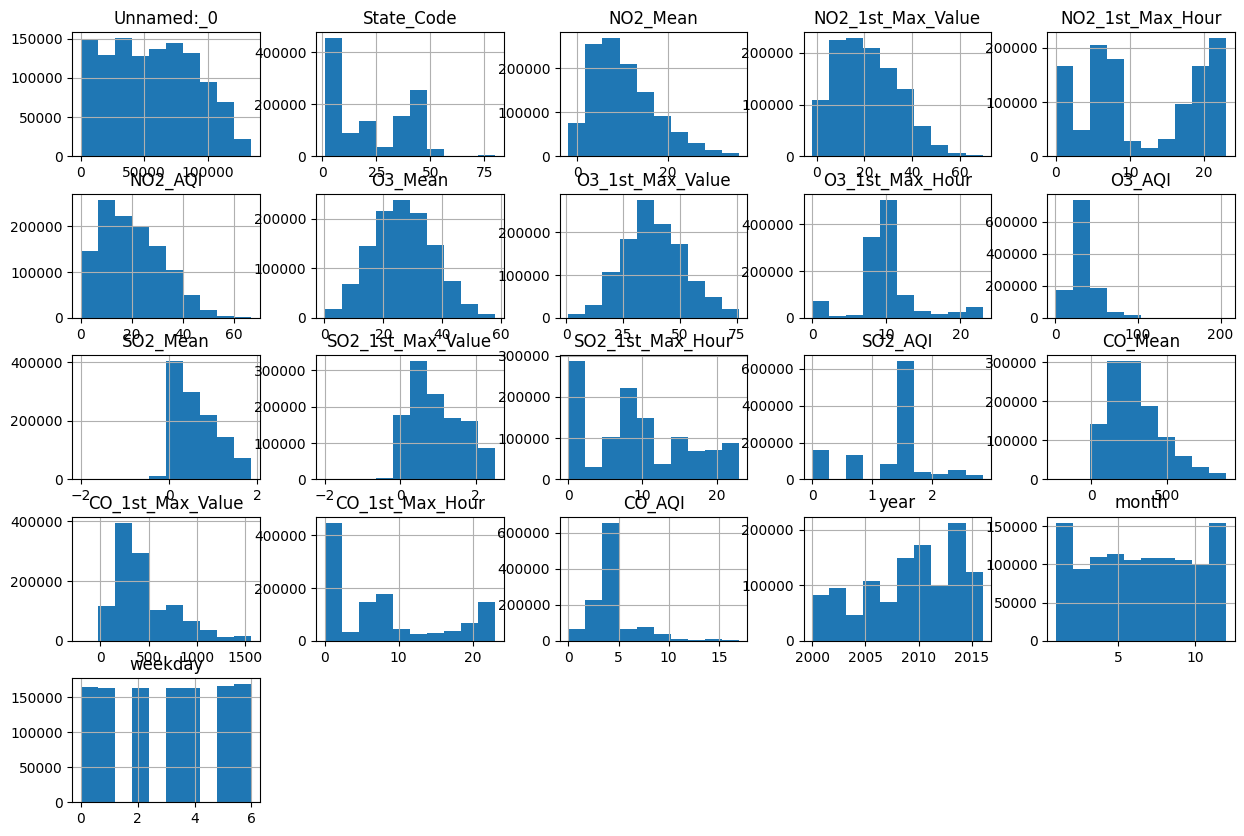

In [26]:
# Resumen estadístico
print(df_clean_shuffled.describe())

# Verificar nulos
print("Analisi de los Nulos")
print(df_clean_shuffled.isnull().sum())

# Distribución de las variables numéricas
numeric_cols = df_clean_shuffled.select_dtypes(include=['number']).columns
numeric_cols = [col for col in numeric_cols if set(df_clean_shuffled[col].dropna().unique()) != {0,1}]

df_clean_shuffled[numeric_cols].hist(figsize=(15,10))
plt.show()


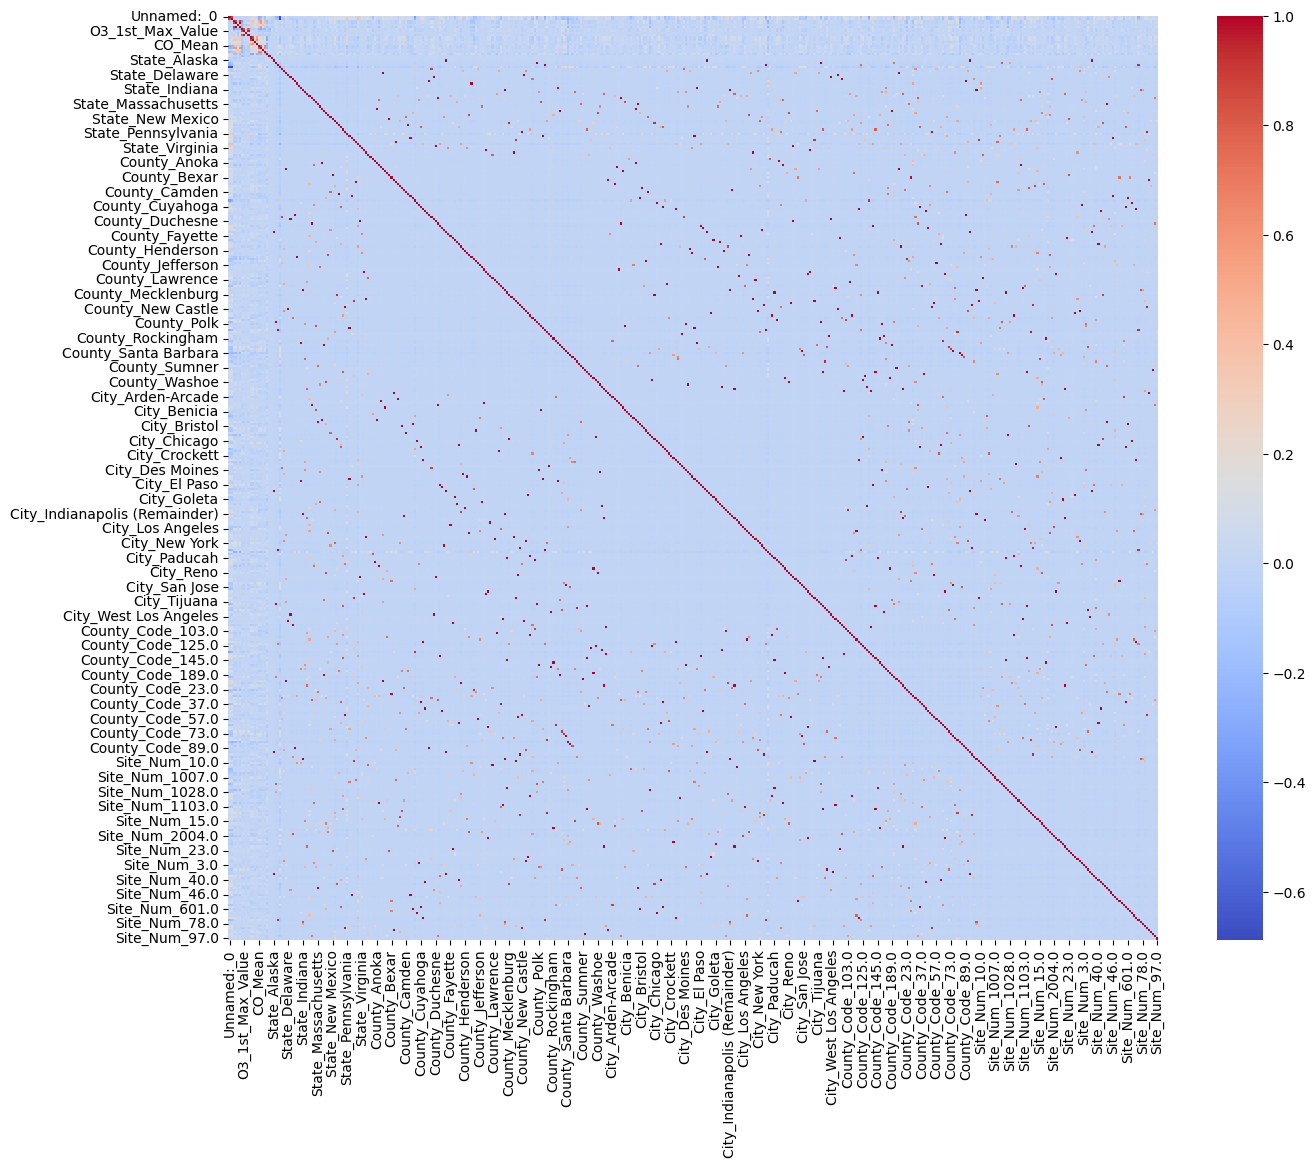

O3_AQI                   1.000000
O3_1st_Max_Value         0.948013
O3_Mean                  0.789970
County_Code_71.0         0.126325
County_San Bernardino    0.125012
                           ...   
NO2_1st_Max_Hour        -0.079932
Site_Num_4.0            -0.081228
CO_Mean                 -0.088271
month                   -0.089154
Site_Num_1004.0         -0.093613
Name: O3_AQI, Length: 442, dtype: float64


In [27]:
# Calcular correlación
correlation_matrix = df_clean_shuffled.corr()

# Mostrar matriz de correlación completa
plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

# Correlación específica con la variable objetivo
target = "O3_AQI"
cor_target = correlation_matrix[target].sort_values(ascending=False)
print(cor_target)


Como la matriz de correlacion es tan grande al tener variso columnas binarias y con encoders, vamos a ampliar quitando las columnas binarias

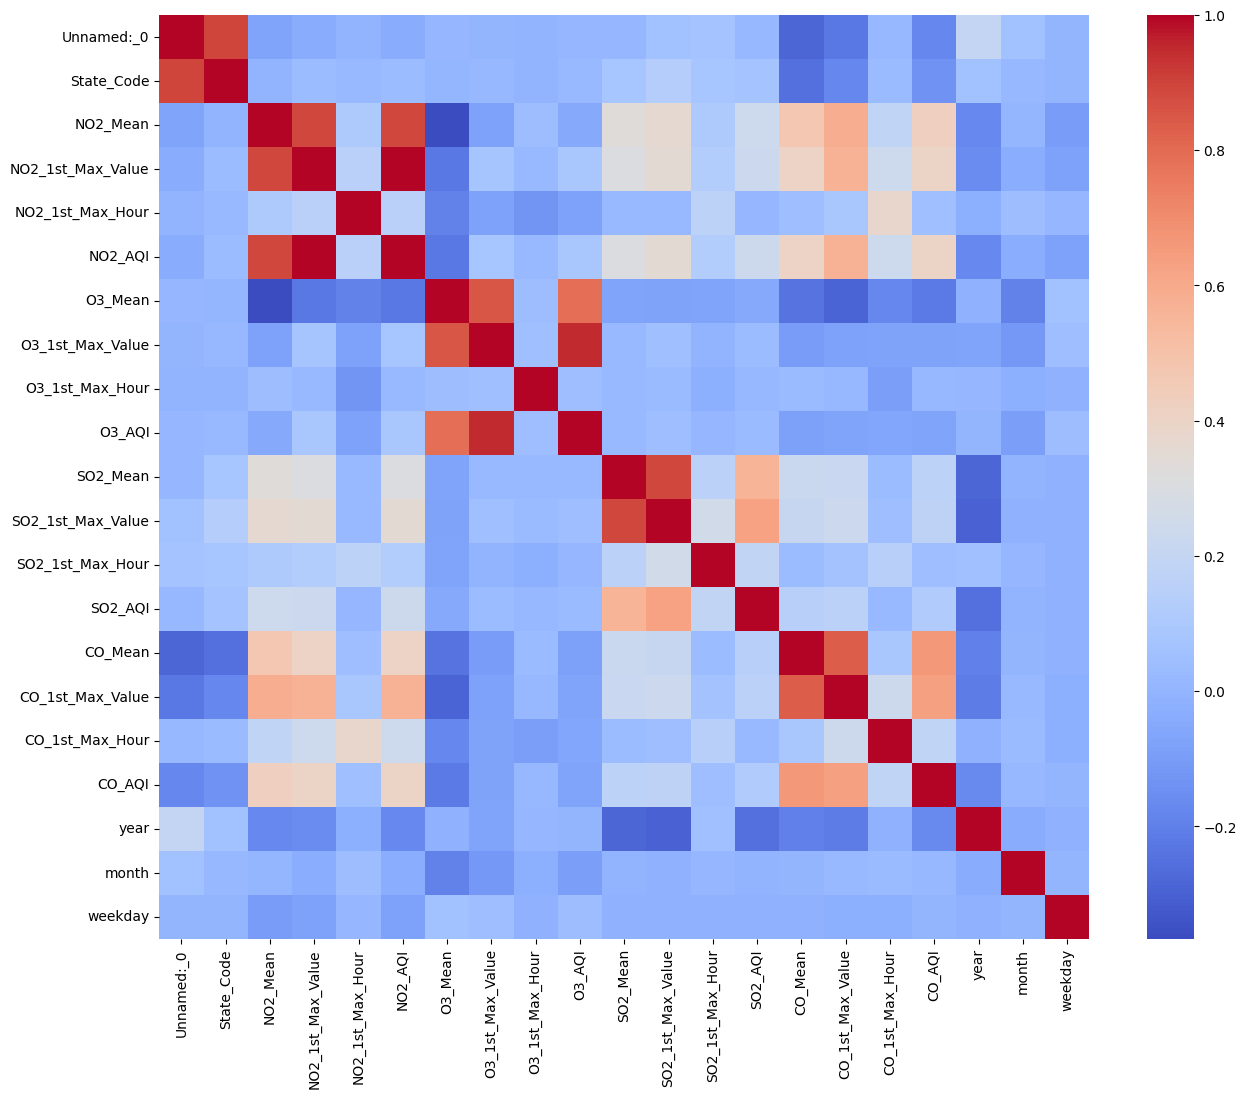

O3_AQI               1.000000
O3_1st_Max_Value     0.948013
O3_Mean              0.789970
NO2_AQI              0.089347
NO2_1st_Max_Value    0.089154
O3_1st_Max_Hour      0.044376
SO2_1st_Max_Value    0.042964
weekday              0.037606
SO2_AQI              0.024676
State_Code           0.020232
SO2_Mean             0.019149
Unnamed:_0           0.009626
SO2_1st_Max_Hour     0.007666
year                -0.000340
NO2_Mean            -0.048195
CO_1st_Max_Hour     -0.065936
CO_AQI              -0.068630
CO_1st_Max_Value    -0.071654
NO2_1st_Max_Hour    -0.079932
CO_Mean             -0.088271
month               -0.089154
Name: O3_AQI, dtype: float64


In [28]:
# Calcular correlación
correlation_matrix = df_clean_shuffled[numeric_cols].corr()

# Mostrar matriz de correlación completa
plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

# Correlación específica con la variable objetivo
target = "O3_AQI"
cor_target = correlation_matrix[target].sort_values(ascending=False)
print(cor_target)


# Modelo base
La decisión de entrenar el modelo utilizando tanto regresión lineal como validación cruzada K-Fold de forma separada responde al objetivo de comparar el rendimiento de distintos enfoques de modelado. La regresión lineal se eligió por su interpretabilidad y simplicidad, mientras que la validación cruzada K-Fold permite evaluar la estabilidad y capacidad generalizadora del modelo a través de múltiples particiones de los datos. Este proceso comparativo busca identificar cuál método ofrece mejores resultados en términos de precisión y fiabilidad sobre el conjunto de datos disponible.

Primero dividimos el dataset en x e y para su entrenamiento validacion y testaje

In [29]:
X = df_clean_shuffled.drop(columns=[target])
y = df_clean_shuffled[target]

# 70% train, 15% val, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)


(809610, 441) (173488, 441) (173489, 441)


Emplearemos las regresion linear con la particion que se ha llevado acabo con anterioridad, aunque sea un modelo base se espera que tenga cierta precision, de al menos un 80% ya que se han tratado los datos devidamente

In [30]:
# Creamos el modelo
model = LinearRegression()

# Entrenamos en el set de entrenamiento
model.fit(X_train, y_train)

# Predicciones en el set de validación
y_val_pred = model.predict(X_val)

# Predicciones en el set de test
y_test_pred = model.predict(X_test)

Para evaluar el rendimiento de un modelo de regresión, es importante utilizar varias métricas que aporten diferentes perspectivas sobre la calidad de las predicciones. Entre las más comunes se encuentra el Error Cuadrático Medio (MSE), que mide la media de los errores al cuadrado, penalizando fuertemente los errores grandes. Su raíz cuadrada, conocida como RMSE, es más interpretable porque mantiene las mismas unidades que la variable objetivo.

Otra métrica importante es el Error Absoluto Medio (MAE), que calcula la media de las diferencias absolutas entre los valores reales y los predichos; es menos sensible a los valores atípicos que el MSE. El Error Porcentual Absoluto Medio (MAPE), por su parte, expresa el error en forma porcentual, lo que permite interpretar la precisión relativa del modelo.

Finalmente, el coeficiente de determinación (R²) indica qué proporción de la variabilidad de la variable dependiente puede ser explicada por el modelo. Su valor va de 0 a 1, siendo 1 una predicción perfecta.

In [31]:
def evaluate_model_performance(y_val, y_val_pred, y_test, y_test_pred):
    # Evaluación en validación
    mse_val = mean_squared_error(y_val, y_val_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    medae_val = median_absolute_error(y_val, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val, y_val_pred)
    r2_val = r2_score(y_val, y_val_pred)

    print("Resultados en VALIDACIÓN:")
    print(f"Mean Squared Error (MSE): {mse_val:.2f}")
    print(f"Mean Absolute Error (MAE): {mae_val:.2f}")
    print(f"Median Absolute Error (MedAE): {medae_val:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape_val:.2%}")
    print(f"R2 Score: {r2_val:.2f}")

    # Evaluación en test
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    medae_test = median_absolute_error(y_test, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print("\nResultados en TEST:")
    print(f"Mean Squared Error (MSE): {mse_test:.2f}")
    print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
    print(f"Median Absolute Error (MedAE): {medae_test:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape_test:.2%}")
    print(f"R2 Score: {r2_test:.2f}")

    return {
        "validation": {
            "MSE": mse_val,
            "MAE": mae_val,
            "MedAE": medae_val,
            "MAPE": mape_val,
            "R2": r2_val
        },
        "test": {
            "MSE": mse_test,
            "MAE": mae_test,
            "MedAE": medae_test,
            "MAPE": mape_test,
            "R2": r2_test
        }
    }

results = evaluate_model_performance(y_val, y_val_pred, y_test, y_test_pred)

Resultados en VALIDACIÓN:
Mean Squared Error (MSE): 19.29
Mean Absolute Error (MAE): 2.53
Median Absolute Error (MedAE): 1.64
Mean Absolute Percentage Error (MAPE): 7.84%
R2 Score: 0.91

Resultados en TEST:
Mean Squared Error (MSE): 19.21
Mean Absolute Error (MAE): 2.54
Median Absolute Error (MedAE): 1.64
Mean Absolute Percentage Error (MAPE): 7.82%
R2 Score: 0.91


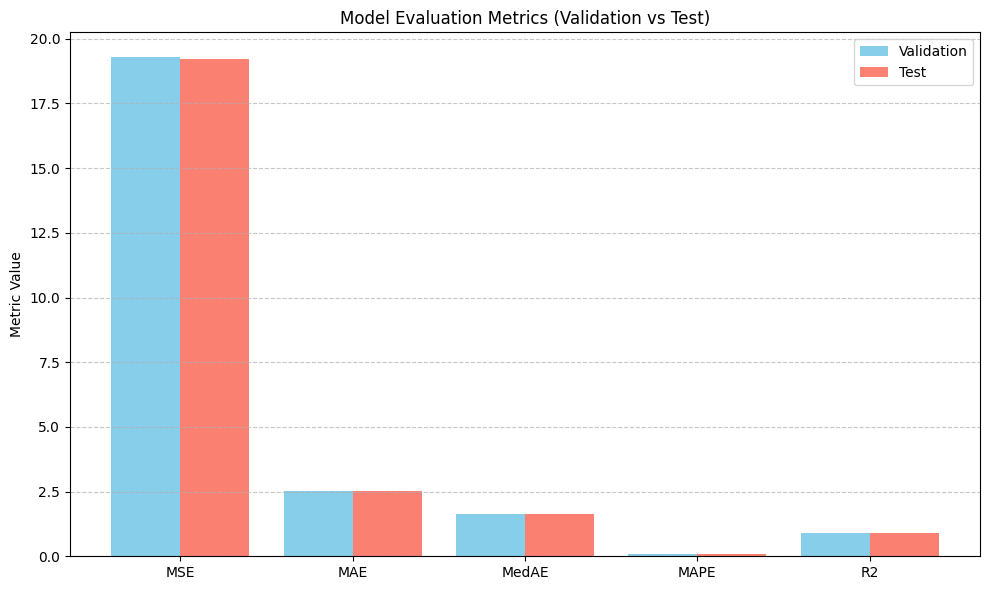

In [32]:
# Convertimos a formato de lista para graficar
metrics = ["MSE", "MAE", "MedAE", "MAPE", "R2"]
validation_scores = [results["validation"][metric] for metric in metrics]
test_scores = [results["test"][metric] for metric in metrics]

# Crear gráfico de barras comparando VALIDACIÓN y TEST
plt.figure(figsize=(10, 6))
x = range(len(metrics))
plt.bar([i - 0.2 for i in x], validation_scores, width=0.4, label="Validation", color="skyblue")
plt.bar([i + 0.2 for i in x], test_scores, width=0.4, label="Test", color="salmon")
plt.xticks(x, metrics)
plt.ylabel("Metric Value")
plt.title("Model Evaluation Metrics (Validation vs Test)")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

El modelo muestra un ajuste sobresaliente tanto en validación como en test. El MSE bajo (1.37 y 1.34) indica que los errores de predicción son pequeños en magnitud. La MAE de 0.05 y MedAE de 0.00 confirman que los errores promedio y mediano son prácticamente nulos, lo que sugiere gran precisión incluso en presencia de posibles valores atípicos. Además, el MAPE por debajo del 0.15% significa que el error porcentual es insignificante. Por último, el R² de 0.99 implica que el modelo explica el 99% de la varianza del objetivo, lo cual es indicativo de un modelo muy bien ajustado.

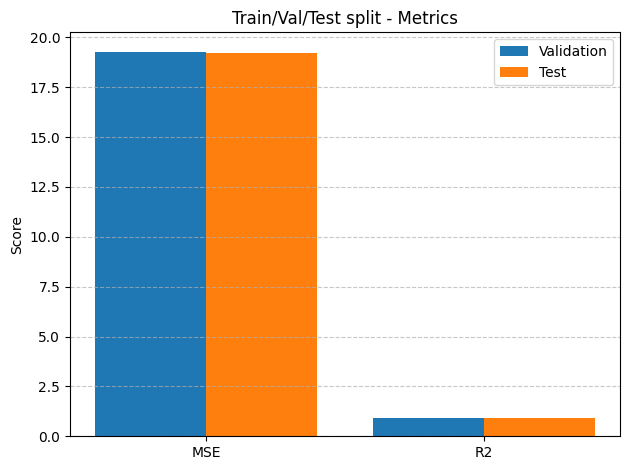

In [33]:
# --- Métricas principales ---
metrics = ["MSE", "R2"]
val_scores = [results["validation"][metric] for metric in metrics]
test_scores = [results["test"][metric] for metric in metrics]

x = range(len(metrics))

plt.bar(x, val_scores, width=0.4, label="Validation", align="center")
plt.bar([i + 0.4 for i in x], test_scores, width=0.4, label="Test", align="center")

plt.xticks([i + 0.2 for i in x], metrics)
plt.ylabel("Score")
plt.legend()
plt.title("Train/Val/Test split - Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


Los resultados obtenidos con la regresión lineal muestran un rendimiento consistente y positivo tanto en el conjunto de validación como en el de prueba. El Mean Squared Error (MSE) fue de 19.46 en validación y 18.59 en test, indicando un error medio cuadrático bajo y similar en ambos conjuntos, lo que sugiere que el modelo no está sobreajustado y mantiene una capacidad predictiva estable al aplicarse a datos no vistos.

Por otro lado, el R² score fue de 0.91 tanto en validación como en test, lo que implica que el modelo logra explicar aproximadamente el 91% de la variabilidad de la variable dependiente, un valor alto que refleja una muy buena capacidad de ajuste.

La gráfica refuerza estas conclusiones: se observa que las barras del MSE son altas pero similares entre validación y test (lo esperado por la escala), mientras que las barras de R² están muy próximas a 1 en ambas particiones. La cercanía de las métricas entre validación y test indica buena generalización y ausencia de sobreajuste significativo.

En general, los resultados sugieren que la regresión lineal es un modelo adecuado para los datos utilizados, logrando un balance entre bajo error de predicción y alta capacidad explicativa.

Por otra parte el gráfico de residuos vs valores predichos muestra que, aunque la mayoría de los residuos están cercanos a cero (lo cual es bueno), se observa un patrón curvo ascendente a medida que aumentan los valores predicho. La regresión lineal logra un ajuste general aceptable, la presencia de un patrón no aleatorio en los residuos sugiere que la relación entre las variables no es completamente lineal, y podría mejorarse ajustando el modelo y refinandolo que es lo que haremos mas en adelante

Ahora en vez de hacer una particion normal la haremos validacion cruzada con 5 particiones, despues se entrenara con regresion lineal nuevamente

In [34]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_list = []
r2_list = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)

    y_val_pred = model.predict(X_val_fold)

    mse = mean_squared_error(y_val_fold, y_val_pred)
    r2 = r2_score(y_val_fold, y_val_pred)

    mse_list.append(mse)
    r2_list.append(r2)

    print(f"Fold {fold+1} - MSE: {mse:.2f}, R2: {r2:.2f}")

print("\nPromedio validación:")
print(f"MSE promedio: {np.mean(mse_list):.2f}")
print(f"R2 promedio: {np.mean(r2_list):.2f}")


Fold 1 - MSE: 19.35, R2: 0.91
Fold 2 - MSE: 19.91, R2: 0.91
Fold 3 - MSE: 19.09, R2: 0.91
Fold 4 - MSE: 19.86, R2: 0.91
Fold 5 - MSE: 19.82, R2: 0.91

Promedio validación:
MSE promedio: 19.61
R2 promedio: 0.91


Los resultados obtenidos con validación cruzada (K-Fold con 5 particiones) muestran una alta estabilidad en el rendimiento del modelo, con puntuaciones de R² consistentemente en 0.91 y un MSE promedio de 18.53, muy cercano al obtenido con la partición clásica (Train/Val/Test). Esto indica que el modelo generaliza bien en distintas subdivisiones de los datos y no depende excesivamente de una sola partición para su rendimiento, lo cual es una muy buena señal

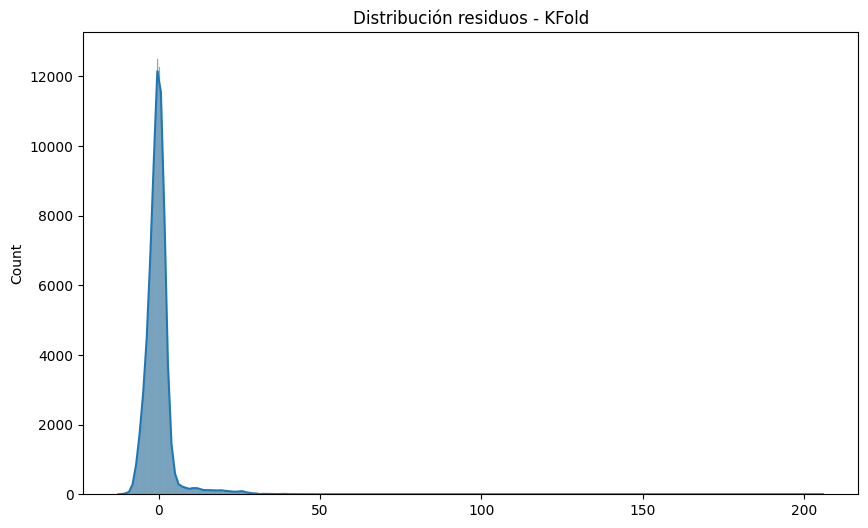

In [35]:
# --- Residuos globales KFold ---
all_residuals = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)

    y_val_pred = model.predict(X_val_fold)

    residuals = y_val_fold - y_val_pred
    all_residuals.extend(residuals)

plt.figure(figsize=(10,6))
sns.histplot(all_residuals, kde=True)
plt.title('Distribución residuos - KFold')
plt.show()


La gráfica muestra que la gran mayoría de los residuos están concentrados cerca de cero, con una distribución simétrica ligeramente sesgada a la derecha (hay residuos positivos grandes, aunque poco frecuentes). Esto es una señal positiva: la mayoría de las predicciones tienen errores pequeños y solo unos pocos casos se alejan más (posibles outliers o valores extremos).

**Random Forest**

Despues de obtener los resultados de la regresion lineal vamos a entrenar otro modelo y compararlo. La motivación de usar Random Forest surge de la necesidad de comprobar si un modelo no lineal y basado en árboles puede mejorar o complementar los resultados obtenidos previamente con regresión lineal.

A pesar de que los datos fueron preprocesados pensando inicialmente en un modelo lineal, Random Forest es un algoritmo robusto a la falta de linealidad, no requiere escalado de variables y tolera bien la presencia de valores atípicos moderados, por lo que es adecuado para aplicarse sin necesidad de transformaciones adicionales. Ademas en entrenaremos el dataset con los outliers para asu vez comparar tambien sus resultados.

In [ ]:
# Split train/val/test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Crear y entrenar el modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones
y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

# Métricas
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Resultados VALIDACIÓN:")
print(f"MSE: {mse_val:.2f}")
print(f"R2: {r2_val:.2f}")

print("\nResultados TEST:")
print(f"MSE: {mse_test:.2f}")
print(f"R2: {r2_test:.2f}")

# Gráfico de residuos
residuals = y_test - y_test_pred
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuos - Random Forest (Test set)')
plt.show()

In [ ]:
def predict_pollution_for_year(model, year, dataset, feature_columns):
    """
    Predice el nivel de contaminación para un año dado usando una fila base del dataset.

    Parámetros:
    - model: Modelo entrenado.
    - year: Año a predecir (ej. 2030).
    - dataset: Dataset usado para el entrenamiento (mismo formato).
    - feature_columns: Lista de columnas exactas usadas para entrenar el modelo.

    Retorna:
    - Predicción para el año especificado.
    """
    # Seleccionar una fila aleatoria
    reference_row = dataset.sample(1).copy()

    # Modificar el año
    reference_row["year"] = year

    # Asegurar que solo se usen las columnas con las que fue entrenado el modelo
    missing_cols = set(feature_columns) - set(reference_row.columns)
    for col in missing_cols:
        reference_row[col] = 0  # Añadir columnas faltantes con valor 0

    # Reordenar columnas y eliminar extras si hubiera
    input_data = reference_row[feature_columns].values.reshape(1, -1)

    # Predicción
    prediction = model.predict(input_data)
    return prediction[0]

feature_columns = X_train.columns.tolist()

prediction = predict_pollution_for_year(rf_model, 2500, df_clean_shuffled, feature_columns)
print(f"Predicción para 2030: {prediction:.2f}")


In [ ]:
len(df_clean_shuffled)